<a href="https://colab.research.google.com/github/astrd/07_Redes_Neuronales/blob/main/TFM_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# v2




## Carga de Datos

### Datos Meteostat

In [ ]:

!pip install meteostat


In [ ]:
import meteostat
from datetime import datetime
from meteostat import Point, Daily

# Set time period
start = datetime(1990, 5, 20)
end = datetime(2023, 12, 31)
# Create Point for  alemania berlin
berlin = Point(52.520008, 13.404954, 36)
# Get daily data for 2022
data = Daily(berlin, start, end)
weather_data = data.fetch()
# Display the data
# Rename the time column to date
weather_data.reset_index(inplace=True)
weather_data = weather_data.rename(columns={'time': 'Date'})
weather_data = weather_data.fillna(0)
print(weather_data)


            Date  tavg  tmin  tmax  prcp  snow   wdir  wspd  wpgt    pres  \
0     1990-05-20  14.7   8.4  20.1   0.0   0.0   92.0  18.0  46.8  1018.1   
1     1990-05-21  16.5  10.0  22.8   0.0   0.0  101.0  18.0  64.8  1011.0   
2     1990-05-22  17.5  12.5  22.0   0.0   0.0    4.0  18.7  39.6  1009.6   
3     1990-05-23  17.9  10.0  24.9   0.0   0.0  155.0  11.9  32.4  1010.4   
4     1990-05-24  16.5  12.3  23.0   0.0   0.0  330.0  28.1  50.4  1008.9   
...          ...   ...   ...   ...   ...   ...    ...   ...   ...     ...   
12251 2023-12-04  -0.3  -1.6   1.3   0.0   0.0  215.0  13.0  25.9  1017.1   
12252 2023-12-05  -0.2  -1.3   0.8   0.0   0.0  212.0  11.8  24.1  1018.0   
12253 2023-12-06  -0.7  -1.6   0.4   0.0   0.0  233.0  11.1  24.1  1020.7   
12254 2023-12-07  -0.1  -1.4   1.6   0.0   0.0  209.0  12.7  25.9  1020.4   
12255 2023-12-08   0.5  -0.6   2.0   0.0   0.0  197.0  13.8  27.8  1018.5   

        tsun  
0      522.0  
1      822.0  
2      786.0  
3      678.0  


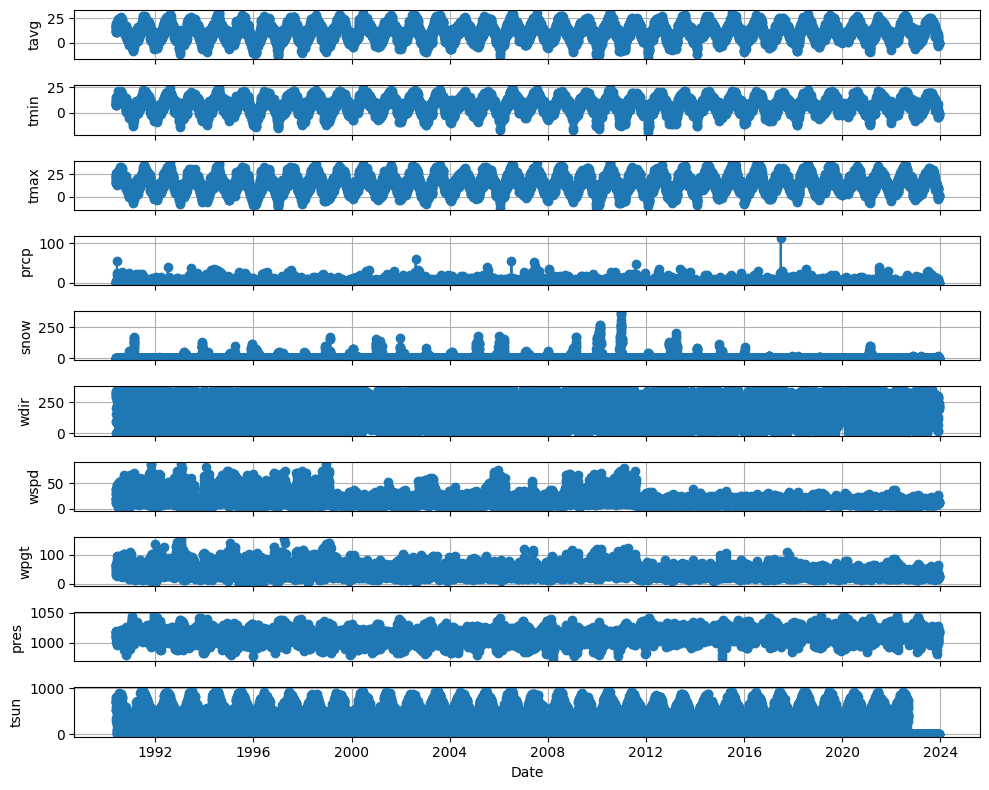

In [ ]:
# Seleccionar solo las columnas numéricas
numeric_columns = weather_data.select_dtypes(include='number').columns

# Crear una figura con subtramas para cada columna numérica
fig, axes = plt.subplots(len(numeric_columns), 1, figsize=(10, 8), sharex=True)

# Graficar cada columna numérica en su subtrama correspondiente
for i, col in enumerate(numeric_columns):
    ax = axes[i]
    ax.plot(weather_data['Date'], weather_data[col], marker='o', linestyle='-', label=col)
    ax.set_ylabel(col)
    ax.grid(True)

    # Ajustes adicionales para la última subtrama
    if i == len(numeric_columns) - 1:
        ax.set_xlabel('Date')

# Ajustar el espaciado entre subtramas para evitar superposiciones
plt.tight_layout()

# Mostrar la gráfica
plt.show()

---------



### Energía Consumida

In [ ]:
from google.colab import files

import pandas as pd
import io

file_name = 'nrger.csv'
datanrg = pd.read_csv(file_name)



In [ ]:
datanrg = datanrg[['TIME_PERIOD', 'OBS_VALUE']]
datanrg.columns.values[1] = "Energy"
datanrg.columns.values[0] = "Date"


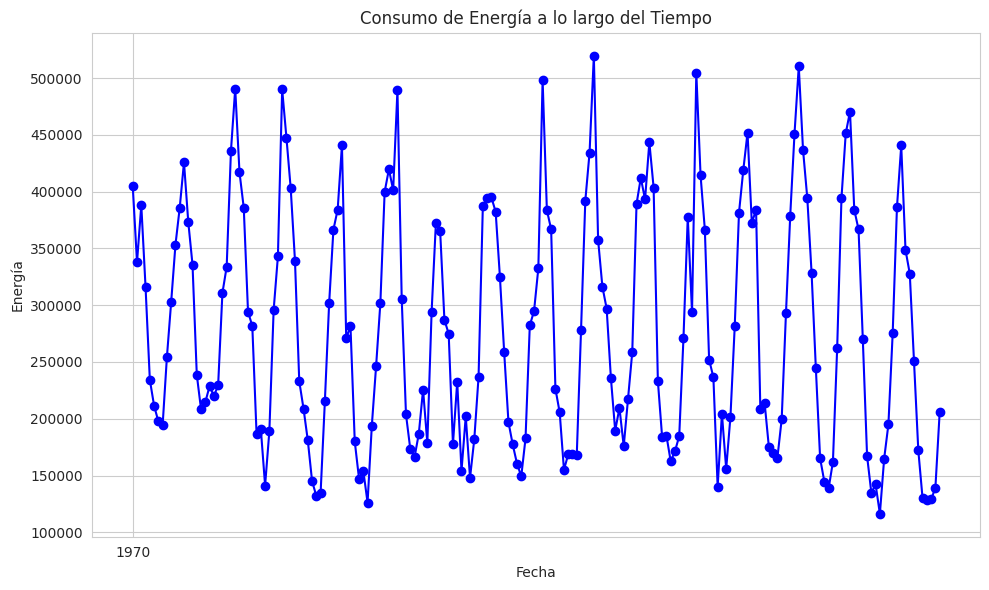

In [ ]:
# Graficar la columna "Energy" en función de la columna "Date"
plt.figure(figsize=(10, 6))
plt.plot(datanrg['Date'], datanrg['Energy'], marker='o', linestyle='-', color='blue')
plt.title('Consumo de Energía a lo largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Energía')
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'));

plt.grid(True)
plt.tight_layout()

# Mostrar la gráfica
plt.show()

In [ ]:

datanrg['Date'] = pd.to_datetime(datanrg['Date'], errors='coerce')
datanrg.set_index('Date', inplace=True)  # Set 'Date' column as the index

# Resample monthly data to daily frequency with forward fill
datanrg = datanrg.resample('D').ffill()  # Resample to daily with forward fill

### Precio Gas Natural


In [ ]:
from google.colab import files

import pandas as pd
import io

file_name = 'gasprice.csv'
datag = pd.read_csv(file_name)



In [ ]:
datag.columns.values[0] = "Date"
datag.columns.values[1] = "Price"


In [ ]:
datag

Date Price
0     2014-01-02  4.32
1     2014-01-03  4.39
2     2014-01-06  4.50
3     2014-01-07  4.58
4     2014-01-08  4.36
...          ...   ...
2577  2023-11-15  2.88
2578  2023-11-16  2.91
2579  2023-11-17  2.62
2580  2023-11-20  2.49
2581  2023-11-21  2.63

[2582 rows x 2 columns]

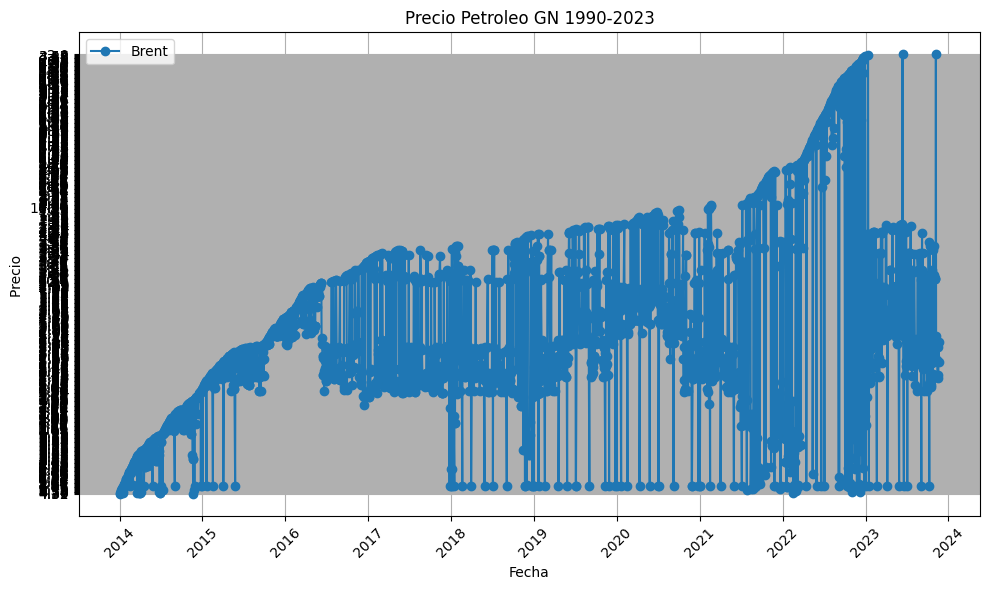

In [ ]:
import matplotlib.pyplot as plt

# Conversion date formato datetime
datag['Date'] = pd.to_datetime(datag['Date'])

plt.figure(figsize=(10, 6))
plt.plot(datag['Date'], datag['Price'], marker='o', label='Brent')
plt.xlabel('Fecha')
plt.ylabel('Precio ')
plt.title('Precio Petroleo GN 1990-2023')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
9272447e-81e2-4714-82d7-19c070ed2074

In [ ]:
lnIzjH777zvYjHmA220iu6VLlw3tdZv1

### Sentimiento Noticias

In [ ]:
from datetime import timedelta
import requests
import pandas as pd
import requests
from datetime import datetime

from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
def fetch_articles():
    url = "https://content.guardianapis.com/search"
    articles = []
    for year in range(2014, datetime.now().year + 1):
        for month in range(1, 13):
            parameters = {
                'q': 'Ukraine War', # query phrase
                'order-by': 'newest', # articles from popular sources and publishers come first
                'lang': 'en', # English articles only
                'api-key': '9272447e-81e2-4714-82d7-19c070ed2074', # your own API key
                'from-date': f"{year}-{month:02d}-01", # start of the month
                'to-date': f"{year}-{month:02d}-02", # end of the month
                'page-size': 1, # only one result per request
            }
            response = requests.get(url, params=parameters)
            data = response.json()
            if 'response' in data and data['response']['status'] == 'ok' and data['response']['results']:
                article = data['response']['results'][0]
                articles.append((article['webPublicationDate'], article['webTitle']))
            else:
                print(f"Unexpected data for {year}-{month:02d}: {data}")
    return articles
articles = fetch_articles()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Unexpected data for 2015-10: {'message': 'API rate limit exceeded'}
Unexpected data for 2016-01: {'message': 'API rate limit exceeded'}
Unexpected data for 2016-02: {'message': 'API rate limit exceeded'}
Unexpected data for 2016-04: {'message': 'API rate limit exceeded'}
Unexpected data for 2016-09: {'message': 'API rate limit exceeded'}
Unexpected data for 2016-12: {'message': 'API rate limit exceeded'}
Unexpected data for 2017-05: {'message': 'API rate limit exceeded'}
Unexpected data for 2018-02: {'message': 'API rate limit exceeded'}
Unexpected data for 2018-04: {'message': 'API rate limit exceeded'}
Unexpected data for 2018-11: {'message': 'API rate limit exceeded'}
Unexpected data for 2019-01: {'message': 'API rate limit exceeded'}
Unexpected data for 2019-03: {'message': 'API rate limit exceeded'}
Unexpected data for 2019-06: {'message': 'API rate limit exceeded'}
Unexpected data for 2019-07: {'message': 'API rate limit exceeded'}
Unexpected data for 2019-08: {'message': 'API ra

In [ ]:
!pip install textblob

In [ ]:
from textblob import TextBlob

# Function to analyze sentiment
def analyze_sentiment(headline):
    blob = TextBlob(headline)
    return blob.sentiment.polarity


datasent = pd.DataFrame(articles, columns=['Date', 'Headline'])
datasent['Sentiment'] = datasent['Headline'].apply(analyze_sentiment)
datasent['Date'] = pd.to_datetime(datasent['Date'], errors='coerce')
datasent['Date'] = datasent['Date'].dt.date

# Set 'Date' column as the DatetimeIndex
datasent.set_index('Date', inplace=True)
datasent.index = pd.to_datetime(datasent.index)  # Ensure 'Date' column is a DatetimeIndex

# Resample to daily frequency with forward fill
datasent = datasent.resample('D').ffill()  # Resample to daily with forward fill

In [ ]:
datasent

Headline  Sentiment
Date                                                                    
2014-01-02  Various artists: Divided & United: The Songs o...       0.00
2014-01-03  Various artists: Divided & United: The Songs o...       0.00
2014-01-04  Various artists: Divided & United: The Songs o...       0.00
2014-01-05  Various artists: Divided & United: The Songs o...       0.00
2014-01-06  Various artists: Divided & United: The Songs o...       0.00
...                                                       ...        ...
2023-10-29  UK food prices fall in September for first tim...       0.25
2023-10-30  UK food prices fall in September for first tim...       0.25
2023-10-31  UK food prices fall in September for first tim...       0.25
2023-11-01  UK food prices fall in September for first tim...       0.25
2023-11-02  Speaker Johnson says decision coming ‘very soo...       0.20

[3592 rows x 2 columns]

In [ ]:
datasent['Date'] = pd.to_datetime(datasent['Date'], errors='coerce')


In [ ]:
datanrg

Energy
Date                
2014-01-01  2898.000
2014-01-02  2898.000
2014-01-03  2898.000
2014-01-04  2898.000
2014-01-05  2898.000
...              ...
2023-09-27  2349.738
2023-09-28  2349.738
2023-09-29  2349.738
2023-09-30  2349.738
2023-10-01  2233.548

[3561 rows x 1 columns]

In [ ]:
datag['Date'] = pd.to_datetime(datag['Date'], errors='coerce')


## Fusion de Datos

In [ ]:
datac = pd.merge(weather_data, datag, on="Date", how="inner")
dataa = pd.merge(datac, datanrg, on="Date", how="inner")

# Display the merged data
data = dataa.fillna(0)

print(data)


          Date  tavg  tmin  tmax  prcp  snow   wdir  wspd  wpgt    pres  \
0   2008-01-01   1.0   0.4   1.5   3.1   0.0  271.0  10.8  23.0  1019.9   
1   2008-02-01   6.3   3.5   8.2   0.0   0.0  209.0  29.2  59.4   991.8   
2   2008-03-01   7.1   5.1   9.1   7.0   0.0  253.0  37.4  96.1   982.4   
3   2008-04-01  12.4   8.4  16.6   1.8   0.0  278.0  10.4  48.2  1013.8   
4   2008-05-01  14.1  11.1  17.8   2.1   0.0  257.0  11.2  36.4  1005.5   
..         ...   ...   ...   ...   ...   ...    ...   ...   ...     ...   
185 2023-06-01  16.2  11.3  21.2   0.0   0.0  303.0  14.8  37.0  1017.7   
186 2023-07-01  18.5  14.4  22.6   0.5   0.0  223.0  12.0  38.9  1006.3   
187 2023-08-01  17.6  16.0  19.5   5.2   0.0  226.0  16.2  40.8   998.7   
188 2023-09-01  15.1  10.8  20.0   0.0   0.0  247.0  10.8  29.6  1013.5   
189 2023-10-01  15.4  12.2  19.1   1.2   0.0  242.0  10.8  25.9  1023.3   

      tsun      Price      Energy  
0      0.0  10.270000  404572.000  
1     24.0  10.270000  3378

In [ ]:
datanrg

Energy
Date                
2014-01-01  2898.000
2014-01-02  2898.000
2014-01-03  2898.000
2014-01-04  2898.000
2014-01-05  2898.000
...              ...
2023-09-27  2349.738
2023-09-28  2349.738
2023-09-29  2349.738
2023-09-30  2349.738
2023-10-01  2233.548

[3561 rows x 1 columns]

## Guardar datos


In [ ]:
data.to_csv('data_merge.csv', index=False)  # Choose your own file name

# Download the file to your computer
files.download('data_merge.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Streamlit

In [ ]:
!pip install -q streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 43.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.1 MB/s eta 0:00:00


In [ ]:
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm notice created a lockfile as package-lock.json. You should commit this file.
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
added 22 packages from 22 contributors and audited 22 packages in 1.736s

3 packages are looking for funding
  run `npm fund` for details

found 1 moderate severity vulnerability
  run `npm audit fix` to fix them, or `npm audit` for details


In [ ]:
!streamlit run app.py &>/content/logs.txt &

In [ ]:
#data.to_csv('data.csv', index=False)
datas = pd.read_csv('data_merge.csv')


In [ ]:
datas

Date  tavg  tmin  tmax  prcp  snow   wdir  wspd  wpgt    pres  tsun  \
0   2014-01-01   7.8   6.1   9.1   4.7   0.0    0.0   0.0   0.0     0.0   0.0   
1   2014-02-01   9.5   3.1  11.9   0.0   0.0    0.0   0.0   0.0     0.0   0.0   
2   2016-03-01  10.8   1.5  16.5   0.0   0.0    0.0   0.0   0.0     0.0   0.0   
3   2016-07-01  29.7  20.9  34.4   0.0   0.0    0.0   0.0   0.0     0.0   0.0   
4   2016-08-01  29.2  20.5  34.6   0.0   0.0    0.0   0.0   0.0     0.0   0.0   
5   2017-07-01  20.4  12.5  24.9   0.0   0.0    0.0   0.0   0.0     0.0   0.0   
6   2017-12-01   4.5   1.3   9.0   0.0   0.0    0.0   0.0   0.0     0.0   0.0   
7   2018-01-01   7.3   3.5  11.5   0.0   0.0    0.0   0.0   0.0     0.0   0.0   
8   2018-02-01   5.6   2.2  10.7   0.1   0.0    0.0   0.0   0.0     0.0   0.0   
9   2018-06-01  17.7  13.5  23.7   2.3   0.0    0.0   0.0   0.0     0.0   0.0   
10  2018-07-01  22.6  18.5  27.9   0.0   0.0    0.0   0.0   0.0     0.0   0.0   
11  2018-09-01  26.6  20.9  33.5   0.0   0.0    0.0   0.0   0.0     0.0   0.0   
12  2019-05-01  18.6  13.4  25.9   0.0   0.0    0.0   0.0   0.0     0.0   0.0   
13  2019-08-01  27.0  20.4  34.2   0.0   0.0    0.0   0.0   0.0     0.0   0.0   
14  2019-09-01  25.0  20.4  31.8   0.0   0.0    0.0   0.0   0.0     0.0   0.0   
15  2020-11-01  13.7   9.2  19.3   0.0   0.0    0.0   3.4   0.0  1025.9   0.0   
16  2021-02-01  11.0   7.8  16.0   0.0   0.0  246.0  19.5   0.0  1016.0   0.0   
17  2021-03-01   8.4   7.3   9.6   0.0   0.0   72.0   9.4   0.0  1022.5   0.0   
18  2021-06-01  18.1  15.9  24.3   0.0   0.0  225.0  11.5   0.0  1010.9   0.0   

        Price    Energy                                           Headline  \
0   10.900000  2898.000  New year celebrations light up skies and stree...   
1   10.830000  2549.000  US and Europe stand with people of Ukraine, sa...   
2    4.090000  2592.000  A manifesto for informed debate on the Brexit ...   
3    4.300000  2121.000                      Marjorie Farquharson obituary   
4    4.250000  1913.000  Trump says if Ivanka was harassed at work she ...   
5    5.096028  2418.000  Russia passes Confederations Cup test but host...   
6    7.209792  3358.000  Michael Flynn's wrongdoing is just the tip of ...   
7    6.648303  3170.000  New year, new rules: what changes around the w...   
8    7.841036  3047.000  Maybe Esther by Katja Petrowskaja review – a f...   
9    7.504423  2181.000  French Open 2018 day six: Djokovic, Zverev and...   
10   7.621063  2172.000  David Hytner’s World Cup diary: ‘A brush with ...   
11   9.518880  2188.000   10 of the best alternative city breaks in Europe   
12   4.360183  2697.000  No laughing matter? What Ukraine's joker-in-ch...   
13   3.270197  2913.000  What should we do with radioactive nuclear waste?   
14   3.086805  2779.000  German president asks Poland for forgiveness a...   
15   4.783508  2897.000  Trump has gone a long way toward hindering dem...   
16   6.171341  2520.660  Donald Trump scrambling to assemble impeachmen...   
17   6.205197  2871.921  Brazilian states blast Bolsonaro – as it happened   
18  10.324139  2438.537         Belarusian activist stabs himself in court   

    Sentiment  
0    0.268182  
1    0.000000  
2    0.000000  
3    0.000000  
4    0.000000  
5   -0.400000  
6    0.000000  
7    0.136364  
8    0.000000  
9    0.266667  
10   0.000000  
11   1.000000  
12   0.000000  
13  -0.200000  
14   0.000000  
15  -0.087500  
16   0.000000  
17   0.000000  
18   0.000000

In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt

from dateutil.relativedelta import relativedelta

data = pd.read_csv('data.csv')
data['Date'] = pd.to_datetime(data['Date'])

st.set_page_config(
    page_title="Real-Time NG predictor",
    page_icon="✅",
    layout="wide",
)
st.title("Real-Time / Live Data Science Dashboard")


# Set default date range values
default_start_date = data["Date"].min()
default_end_date = data["Date"].max()

# Create a date range selection widget
date_range = st.date_input("Select a date range", value=(default_start_date.date(), default_end_date.date()))

# Convert date_range values to pandas Timestamps
start_date = pd.Timestamp(date_range[0])
end_date = pd.Timestamp(date_range[1])

# Filter your dataframe by the selected date range
data = data[(data["Date"] >= start_date) & (data["Date"] <= end_date)]

st.table(data)
# Create a line plot with "Date" on the horizontal axis and a selected column on the vertical axis
column_to_plot = st.selectbox("Select a column to plot against Date", data.columns)
fig, ax = plt.subplots()
ax.plot(data["Date"], data[column_to_plot])
ax.set_xlabel("Date")
ax.set_ylabel(column_to_plot)
st.pyplot(fig)

Overwriting app.py


In [ ]:
import urllib
print("Password/Enpoint IP for localtunnel is:",urllib.request.urlopen('https://ipv4.icanhazip.com').read().decode('utf8').strip("\n"))

Password/Enpoint IP for localtunnel is: 34.125.28.156


In [ ]:
!streamlit run app.py &>/content/logs.txt & --server.enableCORS=false --server.enableWebsocketCompression=false


/bin/bash: line 1: --server.enableCORS=false: command not found


In [ ]:
!npx localtunnel --port 8501

npx: installed 22 in 1.307s
your url is: https://bumpy-candies-stick.loca.lt
^C


## correlation


In [ ]:
# Print all column names in your DataFrame
print(data.columns)


Index(['Date', 'tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'wpgt',
       'pres', 'tsun', 'Price', 'Energy'],
      dtype='object')


Price     1.000000
Date      0.232433
pres      0.047022
tmin      0.031303
tavg      0.007157
prcp     -0.000648
wspd     -0.000841
wpgt     -0.003619
tmax     -0.009750
wdir     -0.017991
snow     -0.039795
Energy   -0.062785
tsun     -0.085420
Name: Price, dtype: float64


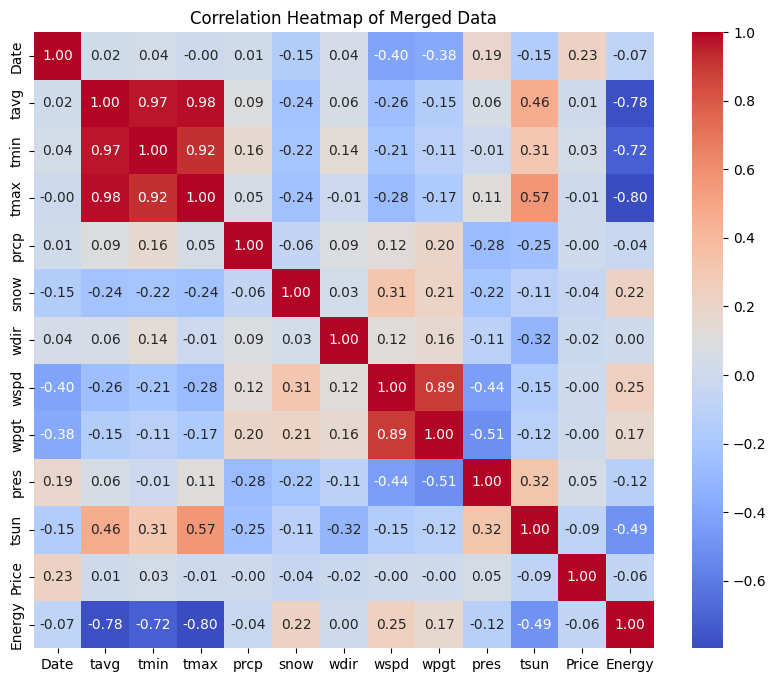

In [ ]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Assuming 'data' is your DataFrame
# Calculate correlation
# Convert all columns to numeric type
data = data.apply(pd.to_numeric, errors='coerce')

correlation = data.corr()['Price'].sort_values(ascending=False)

# Print correlation values
print(correlation)

correlation_matrix = data.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Merged Data')
plt.show()


## model

In [ ]:
from google.colab import files

import pandas as pd
import io
uploaded = files.upload()

file_name = 'data_merge (1).csv'
data  = pd.read_csv(file_name)
data = data.reset_index()
data['Date'] = pd.to_datetime(data['Date'])

# Convert selected columns to numeric
data['Price'] = data['Price'].apply(pd.to_numeric, errors='coerce')


data = data.dropna()

### Linear Regression, SVM, Random Forrest

In [ ]:
errors = []

Linear Regression RMSE: 3.06


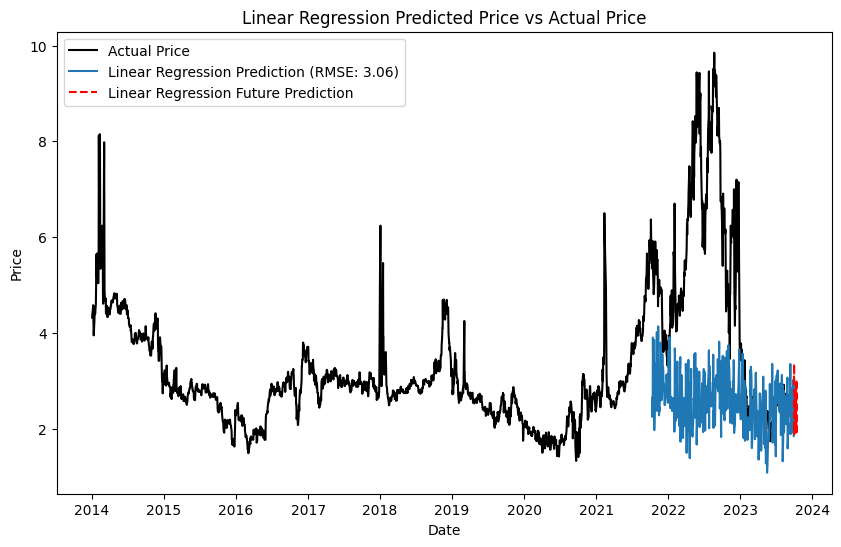

Support Vector Machine RMSE: 2.68


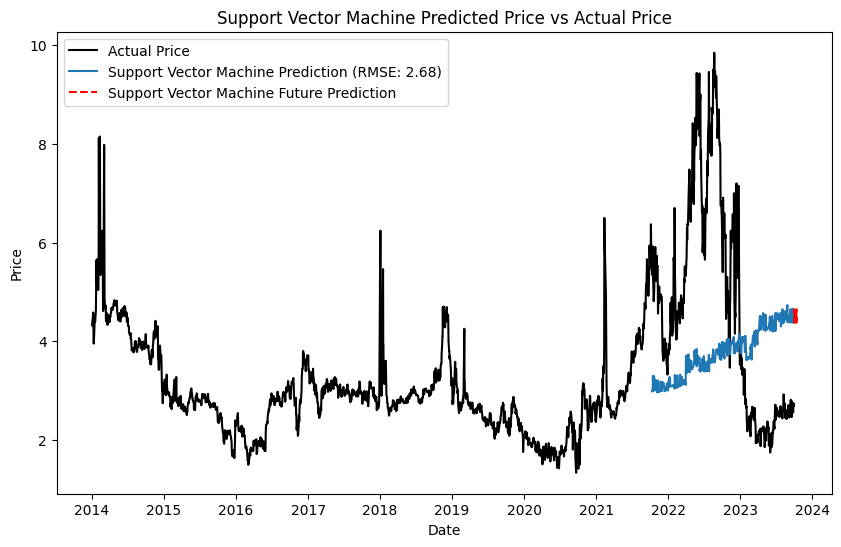

Random Forest RMSE: 2.49


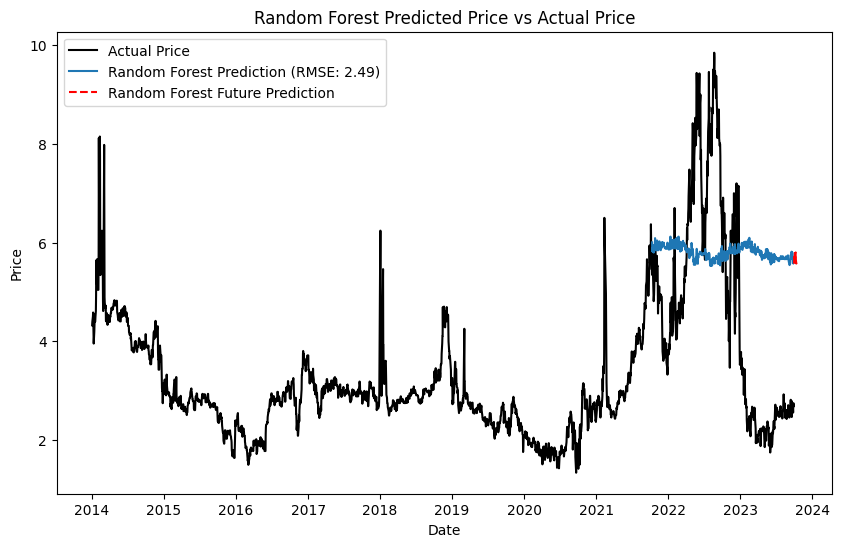

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np
from datetime import timedelta
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from keras.models import Sequential
from keras.layers import LSTM, Dense
from statsmodels.tsa.vector_ar.var_model import VAR

# Assuming 'data' is your DataFrame with columns: 'Date', 'Price', and other weather columns

# Assuming 'Date' column is in datetime format, if not convert it
data['Date'] = pd.to_datetime(data['Date'])

# Sort the DataFrame by 'Date' if not already sorted
data = data.sort_values('Date')

# Calculate the index to split the data for 80% train and 20% test
split_index = int(0.8 * len(data))

# Split data into train and test sets
train_data = data.iloc[:split_index]
test_data = data.iloc[split_index:]

# Extract features (weather columns) and target variable (Price) for train and test sets
X_train = train_data.drop(['Date', 'Price'], axis=1)
y_train = train_data['Price']
X_test = test_data.drop(['Date', 'Price'], axis=1)
y_test = test_data['Price']

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Support Vector Machine': SVR(kernel='rbf'),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

# Train and predict with each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    test_predictions = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
    mse = mean_squared_error(y_test, test_predictions)
    mae = np.mean(np.abs(test_predictions - y_test))

    # Create a dictionary for the current model's errors
    model_errors = {
        'Model': model_name,
        'RMSE': rmse,
        'MSE': mse,
        'MAE': mae
    }

    # Append the dictionary to the list
    errors.append(model_errors)
    print(f"{model_name} RMSE: {rmse:.2f}")

  # Predict 15 days into the future
    future_dates = pd.date_range(start=data['Date'].max() + timedelta(days=1), periods=15, freq='D')
    future_features = X_test.tail(15)  # Taking the last 15 days of test set as initial future features
    future_predictions = []

    for _ in range(15):
        future_prediction = model.predict(future_features)[0]
        future_predictions.append(future_prediction)
        future_features = future_features.shift(-1)
        future_features.iloc[-1] = future_prediction  # Update the last row with the predicted value

    # Create DataFrame for future dates and predictions
    future_data = pd.DataFrame({'Date': future_dates, 'Predicted Price': future_predictions})

     # Plotting the results for different models
    plt.figure(figsize=(10, 6))
    plt.plot(data['Date'], data['Price'], color='black', label='Actual Price')  # Real data in black
    plt.plot(test_data['Date'], test_predictions, label=f'{model_name} Prediction (RMSE: {rmse:.2f})')

    # Plotting future predictions with a different style/color
    plt.plot(future_data['Date'], future_data['Predicted Price'], linestyle='--', color='red', label=f'{model_name} Future Prediction')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(f'{model_name} Predicted Price vs Actual Price')
    plt.legend()
    plt.show()


### Gradient Boosting

Gradient Boosting RMSE: 2.39
         Date  Predicted Price
0  2023-09-30         5.506410
1  2023-10-01         6.058431
2  2023-10-02         5.704343
3  2023-10-03         5.522899
4  2023-10-04         6.058431
5  2023-10-05         5.704343
6  2023-10-06         5.522899
7  2023-10-07         6.058431
8  2023-10-08         5.704343
9  2023-10-09         5.522899
10 2023-10-10         6.058431
11 2023-10-11         5.704343
12 2023-10-12         5.522899
13 2023-10-13         6.058431
14 2023-10-14         5.704343


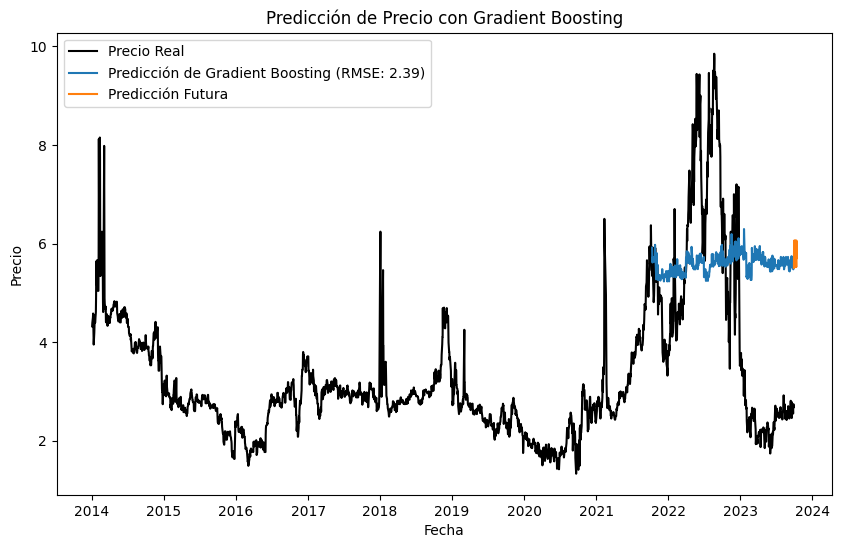

In [ ]:
# Importar las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import timedelta
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

def plot_with_gradient_boosting(data):
    # Asumiendo que 'data' tiene columnas: 'Date', 'Price', y otras columnas de características (variables exógenas)

    # Asegúrate de que la columna 'Date' esté en formato datetime
    data['Date'] = pd.to_datetime(data['Date'])

    # Ordenar el DataFrame por 'Date' si no está ordenado
    data = data.sort_values('Date')

    # Calcular el índice para dividir los datos en 80% de entrenamiento y 20% de prueba
    split_index = int(0.8 * len(data))

    # Dividir los datos en conjuntos de entrenamiento y prueba
    train_data = data.iloc[:split_index]
    test_data = data.iloc[split_index:]

    # Extraer características (columnas relacionadas con el clima u otros) y la variable objetivo (Price) para conjuntos de entrenamiento y prueba
    X_train = train_data.drop(['Date', 'Price'], axis=1)
    y_train = train_data['Price']
    X_test = test_data.drop(['Date', 'Price'], axis=1)
    y_test = test_data['Price']

    # Inicializar el modelo GradientBoostingRegressor
    model = GradientBoostingRegressor(n_estimators=100, random_state=42)

    # Entrenar el modelo
    model.fit(X_train, y_train)

    # Realizar predicciones en el conjunto de prueba
    test_predictions = model.predict(X_test)
    #error
    error = np.sqrt(mean_squared_error(y_test, test_predictions))
    rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
    mse = mean_squared_error(y_test, test_predictions)
    mae = np.mean(np.abs(test_predictions - y_test))

    # Create a dictionary for the current model's errors
    model_errors = {
        'Model': "Gradient Boosting",
        'RMSE': rmse,
        'MSE': mse,
        'MAE': mae
    }

    # Append the dictionary to the list
    errors.append(model_errors)
    print(f"Gradient Boosting RMSE: {error:.2f}")

    # Predecir 15 días en el futuro a partir del último dato real
    future_dates = pd.date_range(start=data['Date'].max() + timedelta(days=1), periods=15, freq='D')
    future_features = data.drop(['Date', 'Price'], axis=1).tail(1)  # Tomar el último día como características iniciales para predecir el futuro
    future_predictions = []

    for _ in range(15):
        future_prediction = model.predict(future_features)[0]
        future_predictions.append(future_prediction)
        future_features = future_features.shift(-1)
        future_features.iloc[-1] = future_prediction  # Actualizar la última fila con el valor predicho

    # Crear un DataFrame para las fechas futuras y las predicciones
    future_data = pd.DataFrame({'Date': future_dates, 'Predicted Price': future_predictions})
    print(future_data)
    # Graficar los resultados
    plt.figure(figsize=(10, 6))
    plt.plot(data['Date'], data['Price'], color='black', label='Precio Real')  # Datos reales en negro
    plt.plot(test_data['Date'], test_predictions, label=f'Predicción de Gradient Boosting (RMSE: {error:.2f})')
    plt.plot(future_data['Date'], future_data['Predicted Price'], label='Predicción Futura')
    plt.xlabel('Fecha')
    plt.ylabel('Precio')
    plt.title('Predicción de Precio con Gradient Boosting')
    plt.legend()
    plt.show()
plot_with_gradient_boosting(data)

### VARX

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



VARX RMSE: 3.13
         Date  Predicted Price
0  2023-09-30         2.393328
1  2023-10-01         2.416468
2  2023-10-02         2.416593
3  2023-10-03         2.416593
4  2023-10-04         2.416593
5  2023-10-05         2.416593
6  2023-10-06         2.416593
7  2023-10-07         2.416593
8  2023-10-08         2.416593
9  2023-10-09         2.416593
10 2023-10-10         2.416593
11 2023-10-11         2.416593
12 2023-10-12         2.416593
13 2023-10-13         2.416593
14 2023-10-14         2.416593


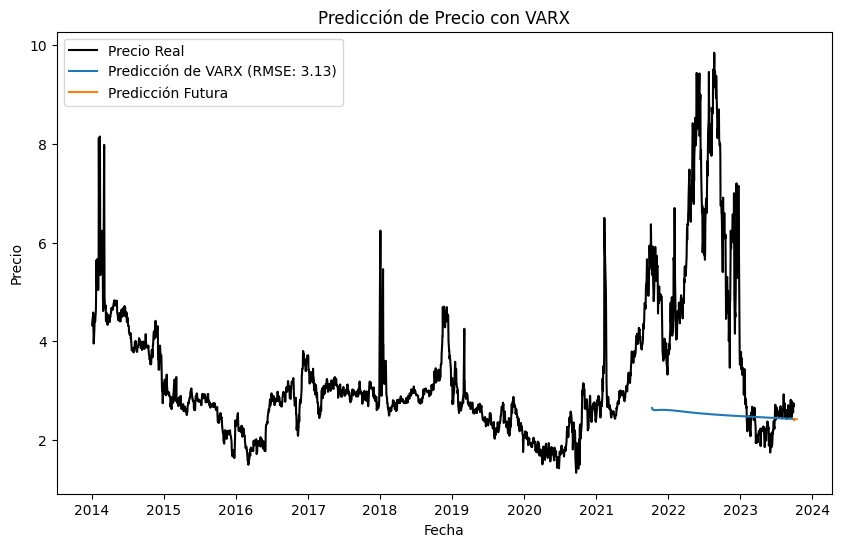

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import timedelta
from statsmodels.tsa.api import VAR
from sklearn.metrics import mean_squared_error

def plot_with_varx(data):
    # Asumiendo que 'data' tiene columnas: 'Date', 'Price' (variable objetivo) y otras columnas de características exógenas

    # Asegúrate de que la columna 'Date' esté en formato datetime
    data['Date'] = pd.to_datetime(data['Date'])

    # Ordenar el DataFrame por 'Date' si no está ordenado
    data = data.sort_values('Date')

    # Calcular el índice para dividir los datos en 80% de entrenamiento y 20% de prueba
    split_index = int(0.8 * len(data))

    # Dividir los datos en conjuntos de entrenamiento y prueba
    train_data = data.iloc[:split_index]
    test_data = data.iloc[split_index:]

    # Variable objetivo: 'Price' para conjuntos de entrenamiento y prueba
    y_train = train_data['Price']
    y_test = test_data['Price']

    # Variables exógenas para conjuntos de entrenamiento y prueba
    exog_train = train_data.drop(['Date', 'Price'], axis=1)
    exog_test = test_data.drop(['Date', 'Price'], axis=1)

    # Combinar la variable objetivo y las variables exógenas para el conjunto de entrenamiento
    train_data_combined = pd.concat([y_train, exog_train], axis=1)

    # Inicializar y ajustar el modelo VARX
    model = VAR(train_data_combined)
    model_fitted = model.fit()

      # Realizar predicciones en el conjunto de prueba
    lag_order = model_fitted.k_ar
    test_data_combined = pd.concat([y_test, exog_test], axis=1)
    forecast_input = test_data_combined.values[-lag_order:]
    forecast = model_fitted.forecast(forecast_input, steps=len(y_test))

    # Extraer las predicciones y calcular el error RMSE
    test_predictions = forecast[:, 0]

    #error
    error = np.sqrt(mean_squared_error(y_test, test_predictions))
    rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
    mse = mean_squared_error(y_test, test_predictions)
    mae = np.mean(np.abs(test_predictions - y_test))

    # Create a dictionary for the current model's errors
    model_errors = {
        'Model': "VARX",
        'RMSE': rmse,
        'MSE': mse,
        'MAE': mae
    }

    # Append the dictionary to the list
    errors.append(model_errors)

    print(f"VARX RMSE: {error:.2f}")

    # Predicciones futuras
    future_dates = pd.date_range(start=data['Date'].max() + timedelta(days=1), periods=15, freq='D')
    future_features = exog_test.tail(1).values  # Tomar el último día como características iniciales para predecir el futuro
    future_predictions = []

    for _ in range(15):
        forecast_input_future = np.concatenate((test_predictions[-lag_order:].reshape(1, -1), future_features.reshape(1, -1)), axis=1)
        future_forecast = model_fitted.forecast(forecast_input_future, steps=1)
        future_prediction = future_forecast[:, 0][0]
        future_predictions.append(future_prediction)
        future_features = np.roll(future_features, -1)
        future_features[-1] = future_prediction  # Actualizar la última entrada con el valor predicho


    # Crear un DataFrame para las fechas futuras y las predicciones
    future_data = pd.DataFrame({'Date': future_dates, 'Predicted Price': future_predictions})
    print(future_data)
    # Graficar los resultados
    plt.figure(figsize=(10, 6))
    plt.plot(data['Date'], data['Price'], color='black', label='Precio Real')  # Datos reales en negro
    plt.plot(test_data['Date'], test_predictions, label=f'Predicción de VARX (RMSE: {error:.2f})')
    plt.plot(future_data['Date'], future_data['Predicted Price'], label='Predicción Futura')
    plt.xlabel('Fecha')
    plt.ylabel('Precio')
    plt.title('Predicción de Precio con VARX')
    plt.legend()
    plt.show()
plot_with_varx(data)

### LSTM

Epoch 1/10
1960/1960 - 24s - loss: 0.0027 - 24s/epoch - 12ms/step
Epoch 2/10
1960/1960 - 19s - loss: 0.0015 - 19s/epoch - 10ms/step
Epoch 3/10
1960/1960 - 18s - loss: 0.0012 - 18s/epoch - 9ms/step
Epoch 4/10
1960/1960 - 18s - loss: 9.1797e-04 - 18s/epoch - 9ms/step
Epoch 5/10
1960/1960 - 18s - loss: 8.7902e-04 - 18s/epoch - 9ms/step
Epoch 6/10
1960/1960 - 20s - loss: 7.7964e-04 - 20s/epoch - 10ms/step
Epoch 7/10
1960/1960 - 18s - loss: 7.3054e-04 - 18s/epoch - 9ms/step
Epoch 8/10
1960/1960 - 18s - loss: 7.5659e-04 - 18s/epoch - 9ms/step
Epoch 9/10
1960/1960 - 18s - loss: 7.5166e-04 - 18s/epoch - 9ms/step
Epoch 10/10
1960/1960 - 19s - loss: 7.0883e-04 - 19s/epoch - 10ms/step
1/1 [==============================] - 0s 22ms/step


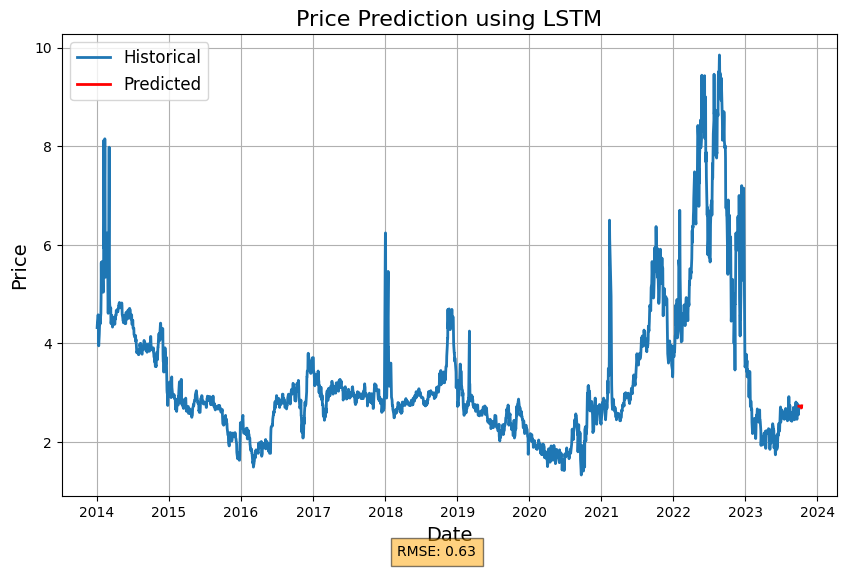

In [ ]:
from pandas.tseries.offsets import DateOffset
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

def predict_LSTM(data):
    # Preprocessing
    data['Date'] = pd.to_datetime(data['Date'])
    data = data.set_index('Date')

    # Create a separate scaler for price
    price_scaler = MinMaxScaler(feature_range=(0, 1))
    price_scaled_data = price_scaler.fit_transform(data['Price'].values.reshape(-1,1))

    # Scale the entire data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)

    # Replace the price column in scaled_data with price_scaled_data
    scaled_data[:, 0] = price_scaled_data.flatten()

    # Convert time series to supervised learning problem
    def create_dataset(dataset, look_back=1):
        X, Y = [], []
        for i in range(len(dataset)-look_back-1):
            a = dataset[i:(i+look_back), :]
            X.append(a)
            Y.append(dataset[i + look_back, 0])
        return np.array(X), np.array(Y)
    X, y = create_dataset(scaled_data, 15)

    # Split data into train and test sets
    train_size = int(len(X) * 0.8)
    test_size = len(X) - train_size
    X_train, X_test = X[0:train_size,:], X[train_size:len(X),:]
    y_train, y_test = y[0:train_size], y[train_size:len(y)]

    # Create and fit the LSTM network
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model for more epochs
    model.fit(X_train, y_train, batch_size=1, epochs=10, verbose=2)

    # Make predictions
    train_predict = model.predict(X_train)
    test_predict = model.predict(X_test)

    # Invert predictions
    train_predict = price_scaler.inverse_transform(train_predict)
    y_train = price_scaler.inverse_transform([y_train])
    test_predict = price_scaler.inverse_transform(test_predict)
    y_test = price_scaler.inverse_transform([y_test])

        # Generate future dates
    future_dates = [data.index[-1] + DateOffset(days=x) for x in range(0, 15)]

    # Initialize future_prices list
    future_prices = []

    # Predict future prices
    for i in range(15, 0, -1):
        future_price = model.predict(scaled_data[-i:].reshape(1, i, scaled_data.shape[1]))
        future_price = price_scaler.inverse_transform(future_price)
        future_prices.append(future_price[0][0])
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test[0], test_predict[:,0]))
    rmse_label = 'RMSE: {:.2f}'.format(rmse)

    #error
    rmse = np.sqrt(mean_squared_error(y_test[0], test_predict[:,0]))
    mse = mean_squared_error(y_test[0], test_predict[:,0])
    mae = np.mean(np.abs(test_predict[:,0] - y_test[0]))

    # Create a dictionary for the current model's errors
    model_errors = {
        'Model': "LSTM",
        'RMSE': rmse,
        'MSE': mse,
        'MAE': mae
    }

    # Append the dictionary to the list
    errors.append(model_errors)

    # Plot the results with better quality
    plt.figure(figsize=(10,6))
    plt.plot(data.index, data['Price'], label='Historical', linewidth=2)
    plt.plot(future_dates, future_prices, label='Predicted', linewidth=2, color='red')
    plt.title('Price Prediction using LSTM', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.figtext(0.5, 0.01, rmse_label, ha="center", fontsize=10, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
    plt.ylabel('Price', fontsize=14)
    plt.legend(loc='best', fontsize=12)
    plt.grid(True)
    plt.show()
predict_LSTM(data)

### DNN

Epoch 1/50
62/62 [==============================] - 1s 2ms/step - loss: 0.0271
Epoch 2/50
62/62 [==============================] - 0s 2ms/step - loss: 0.0235
Epoch 3/50
62/62 [==============================] - 0s 2ms/step - loss: 0.0224
Epoch 4/50
62/62 [==============================] - 0s 2ms/step - loss: 0.0208
Epoch 5/50
62/62 [==============================] - 0s 2ms/step - loss: 0.0201
Epoch 6/50
62/62 [==============================] - 0s 3ms/step - loss: 0.0194
Epoch 7/50
62/62 [==============================] - 0s 3ms/step - loss: 0.0184
Epoch 8/50
62/62 [==============================] - 0s 4ms/step - loss: 0.0181
Epoch 9/50
62/62 [==============================] - 0s 3ms/step - loss: 0.0172
Epoch 10/50
62/62 [==============================] - 0s 3ms/step - loss: 0.0173
Epoch 11/50
62/62 [==============================] - 0s 3ms/step - loss: 0.0166
Epoch 12/50
62/62 [==============================] - 0s 3ms/step - loss: 0.0161
Epoch 13/50
62/62 [==============================

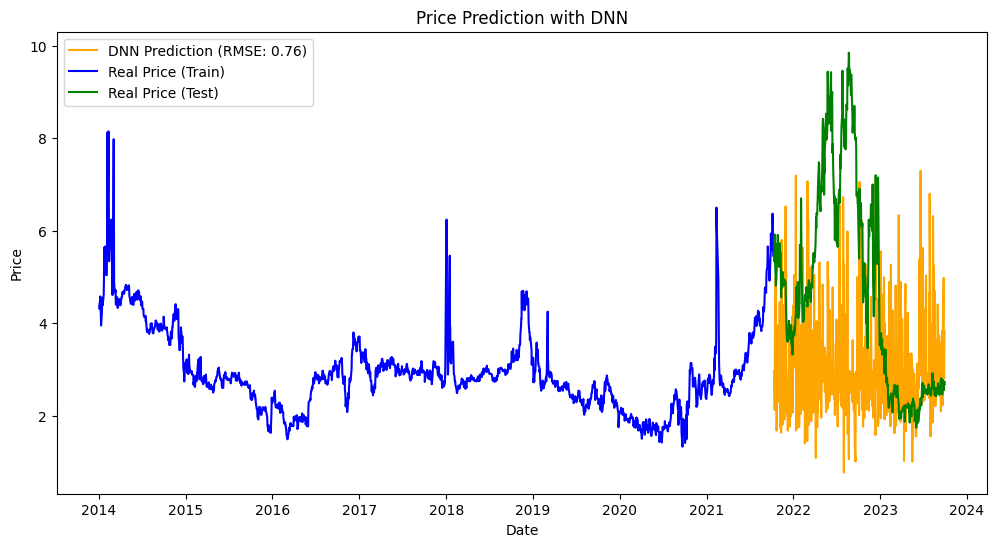

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def prepare_dnn_data(data):
    # Asumiendo que 'data' tiene columnas: 'Date', 'Price' (variable objetivo) y otras columnas de características exógenas

    # Asegúrate de que la columna 'Date' esté en formato datetime
    data['Date'] = pd.to_datetime(data['Date'])

    # Ordenar el DataFrame por 'Date' si no está ordenado
    data = data.sort_values('Date')

    # Seleccionar características (columnas exógenas) y variable objetivo 'Price'
    features = data.drop(['Date', 'Price'], axis=1).values
    target = data['Price'].values.reshape(-1, 1)

    # Escalar los datos
    scaler = MinMaxScaler()
    features_scaled = scaler.fit_transform(features)
    target_scaled = scaler.fit_transform(target)

    # Dividir los datos en conjuntos de entrenamiento y prueba (80-20)
    X_train, X_test, y_train, y_test = train_test_split(features_scaled, target_scaled, test_size=0.2, random_state=42)

    return X_train, X_test, y_train, y_test, scaler, data['Date'], data['Price']

# ... (previous code remains unchanged)

def plot_with_dnn(data):
    X_train, X_test, y_train, y_test, scaler, dates, prices = prepare_dnn_data(data)

    # Initialize DNN model and train
    model = Sequential()
    model.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(units=32, activation='relu'))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

    # Make predictions
    test_predictions = model.predict(X_test)
    test_predictions = scaler.inverse_transform(test_predictions).flatten()
    y_test = scaler.inverse_transform(y_test).flatten()

    # Calculate RMSE on the test set
    error = np.sqrt(np.mean(np.square(test_predictions - y_test)))
    print(f"DNN RMSE: {error:.2f}")

    rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
    mse = mean_squared_error(y_test, test_predictions)
    mae = np.mean(np.abs(test_predictions - y_test))

    # Create a dictionary for the current model's errors
    model_errors = {
        'Model': "DNN",
        'RMSE': rmse,
        'MSE': mse,
        'MAE': mae
    }

    # Append the dictionary to the list
    errors.append(model_errors)

    # Determine the index to start predictions after the last date from the test set
    start_predictions = len(X_train)  # Start predictions after the last date from the training set

    # Plot the results
    plt.figure(figsize=(12, 6))
    plt.plot(dates[start_predictions:start_predictions+len(test_predictions)], test_predictions, label=f'DNN Prediction (RMSE: {error:.2f})', color='orange')
    plt.plot(dates[:len(X_train)], prices[:len(X_train)], label='Real Price (Train)', color='blue')
    plt.plot(dates[len(X_train):start_predictions+len(test_predictions)], prices[len(X_train):start_predictions+len(test_predictions)], label='Real Price (Test)', color='green')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Price Prediction with DNN')
    plt.legend()
    plt.show()

# Call the function to plot using DNN
plot_with_dnn(data)



### prophet

In [ ]:
import io, os, sys, setuptools, tokenize

!pip install pystan==2.19.1.1
!pip install convertdate
!pip install lunarcalendar
!pip install holidays==0.25
!pip install fbprophet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.8/121.8 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for holidays: filename=holidays-0.10.5.2-py3-none-any.whl size=126823 sha256=e8ee94c67c2861a91abb9904d70fcd546362fd7b20a8323a325c997a8d9af003
  Stored in directory: /root/.cache/pip/wheels/4f/d5/72/5534f6c824de297ad074fdb1dc7577c9c0c074485314fee5d6
Successfully built holidays
  Attempting uninstall: holidays
    Found existing installation: holidays 0.36
    Uninstalling holidays-0.36:
      Successfully uninstalled holidays-0.36
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
prophet 1.1.5 requires holidays>=0.25, but you have holidays 0.10.5.2 which is incompatible.
  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py) ... done
  Using cached cmdstanpy-0.9.5-py3-none-any.whl (37 kB)
  Using cached s

In [ ]:
pro_df = data.copy()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/usr/local/lib/python3.10/dist-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.10/dist-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



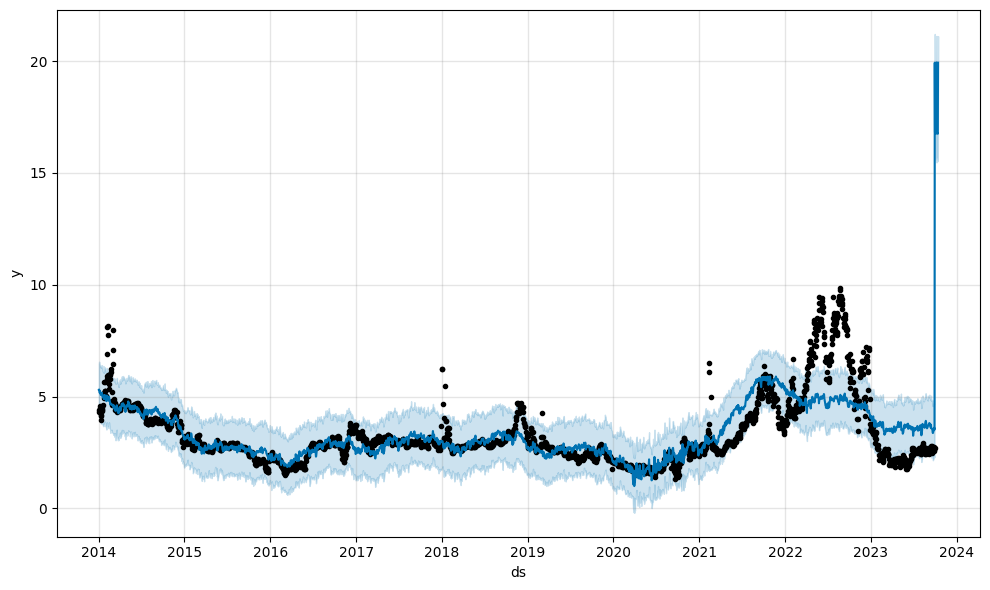

In [ ]:
import pandas as pd
from fbprophet import Prophet

# Replace NaN values with 0 in the original dataframe
pro_df = pro_df.fillna(0)

# Rename columns as required by Prophet
pro_df = pro_df.rename(columns={'Date': 'ds', 'Price': 'y'})
pro_df.reset_index(drop=True, inplace=True)  # Resetting the index without keeping the old index
# Initialize Prophet model
model = Prophet()

# Add all other columns as additional regressors
regressor_columns = [col for col in pro_df.columns if col not in ['ds', 'y']]
for col in regressor_columns:
    model.add_regressor(col)

# Fit the model with the dataframe
model.fit(pro_df)

# Create a dataframe for future predictions
future = model.make_future_dataframe(periods=15)

# Fill future values of the regressors with 0 or any other reasonable value
for col in regressor_columns:
    future[col] = pro_df[col].iloc[-1]

future.reset_index(drop=True)
# Make predictions
fig = model.plot(forecast)
# Extract forecasted price
forecasted_price = forecast['yhat'][-15:]

In [ ]:
future

ds  index  tavg  tmin  tmax  prcp  snow  wdir  wspd  wpgt  pres  \
0    2014-01-02    0.0  10.2   8.3  11.3   5.8   0.0   0.0   0.0   0.0   0.0   
1    2014-01-03    1.0  11.0   9.7  12.9  10.2   0.0   0.0   0.0   0.0   0.0   
2    2014-01-06    2.0   9.2   6.0  10.9   0.0   0.0   0.0   0.0   0.0   0.0   
3    2014-01-07    3.0  10.9   8.1  12.7   0.0   0.0   0.0   0.0   0.0   0.0   
4    2014-01-08    4.0  10.9   6.4  12.9   0.0   0.0   0.0   0.0   0.0   0.0   
...         ...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2476 2023-10-10    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2477 2023-10-11    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2478 2023-10-12    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2479 2023-10-13    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2480 2023-10-14    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

      tsun     y  Energy  
0      0.0  4.32  2898.0  
1      0.0  4.39  2898.0  
2      0.0  4.50  2898.0  
3      0.0  4.58  2898.0  
4      0.0  4.36  2898.0  
...    ...   ...     ...  
2476   0.0  0.00     0.0  
2477   0.0  0.00     0.0  
2478   0.0  0.00     0.0  
2479   0.0  0.00     0.0  
2480   0.0  0.00     0.0  

[2481 rows x 14 columns]

/usr/local/lib/python3.10/dist-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.10/dist-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.10/dist-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.10/dist-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



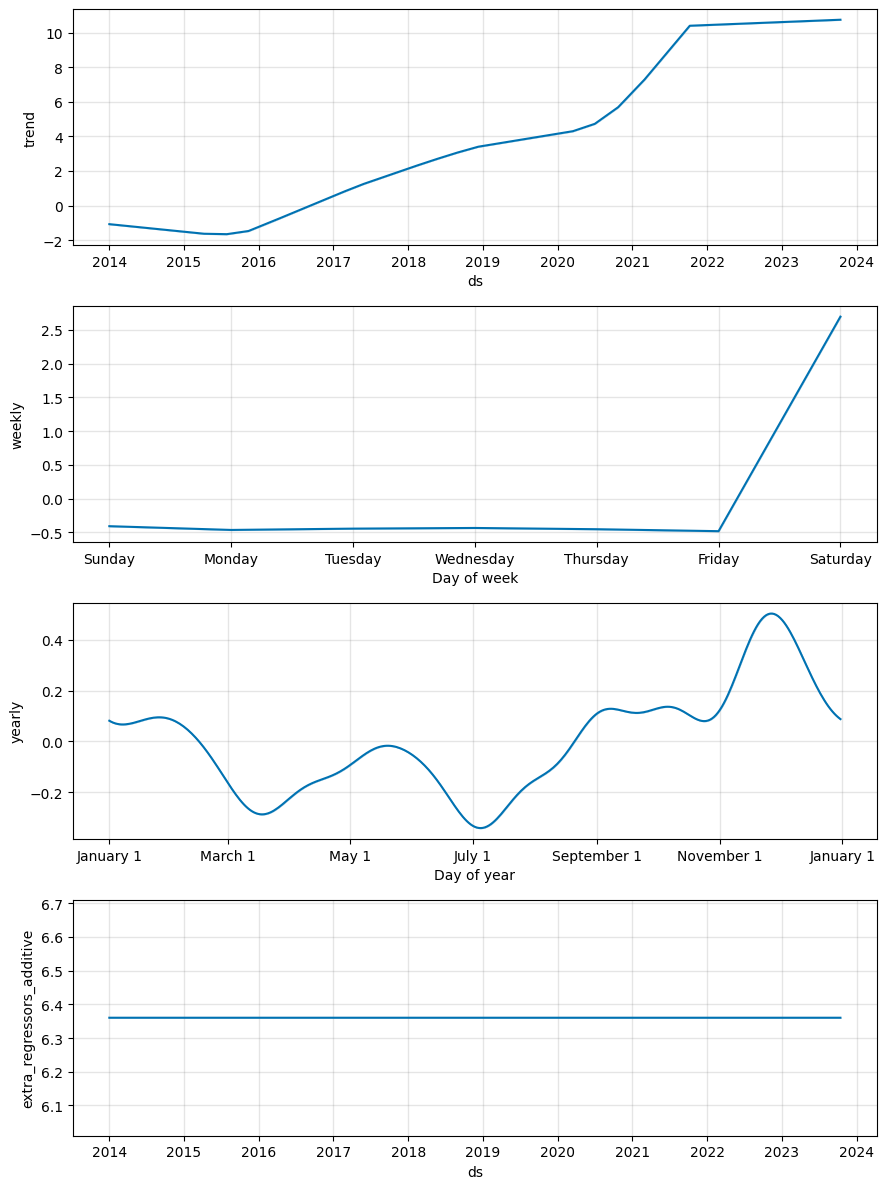

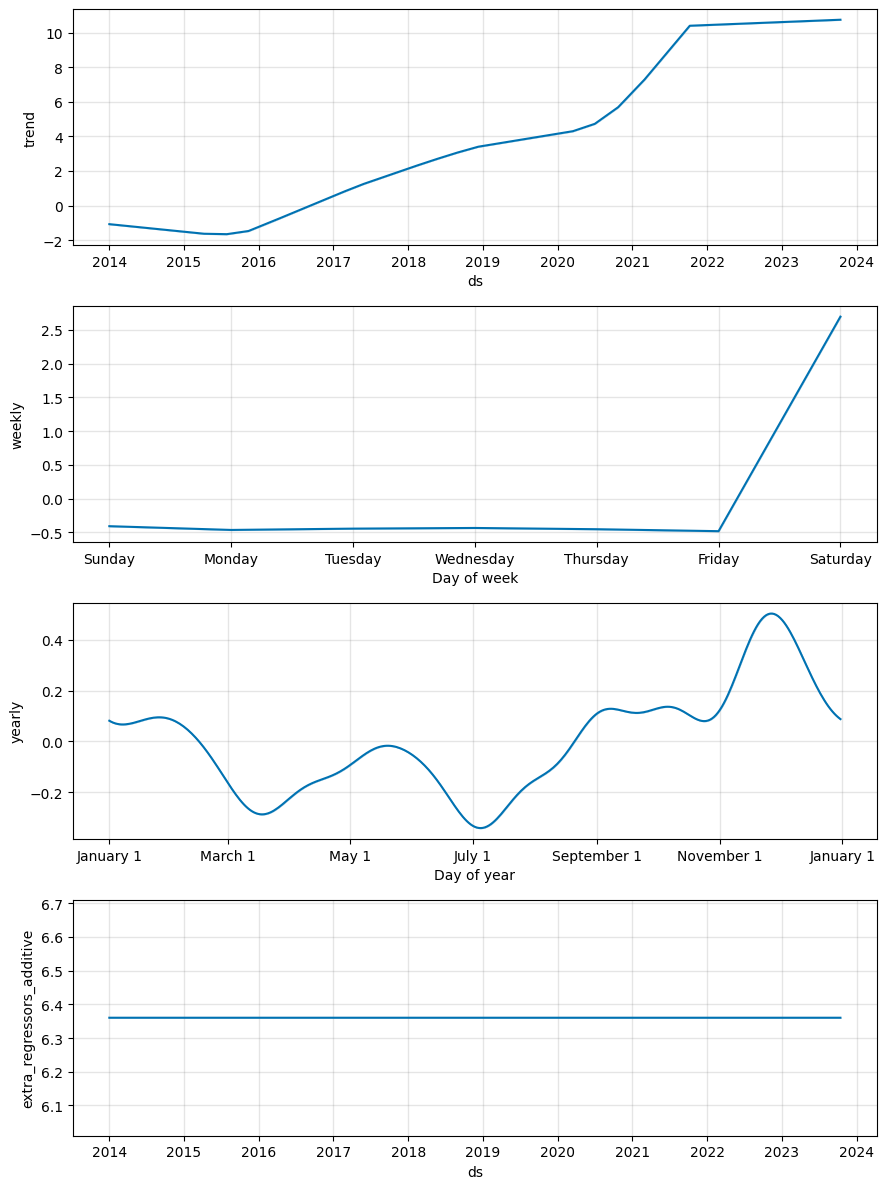

In [ ]:
model.plot_components(forecast)

In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, forecast)
plot_components_plotly(model, forecast)

/usr/local/lib/python3.10/dist-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.10/dist-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.10/dist-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.10/dist-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [ ]:
cmp_df = forecast.set_index('ds')[['yhat','yhat_lower','yhat_upper']].join(pro_df.set_index('ds'))


In [ ]:
def plot_price_forecast(df,start_date, end_date):
    """
    This function filters the dataframe for the specified date range and
    plots the actual and forecast data.

    Assumption:
    - The dataframe has to be indexed on a Datetime column
    This makes the filtering very easy in pandas using df.loc
    """
    cmp_df = df.loc[start_date:end_date]
    plt.figure(figsize=(17,8))
    plt.plot(cmp_df['yhat'])
    plt.plot(cmp_df['y'])
    plt.legend()
    plt.show()

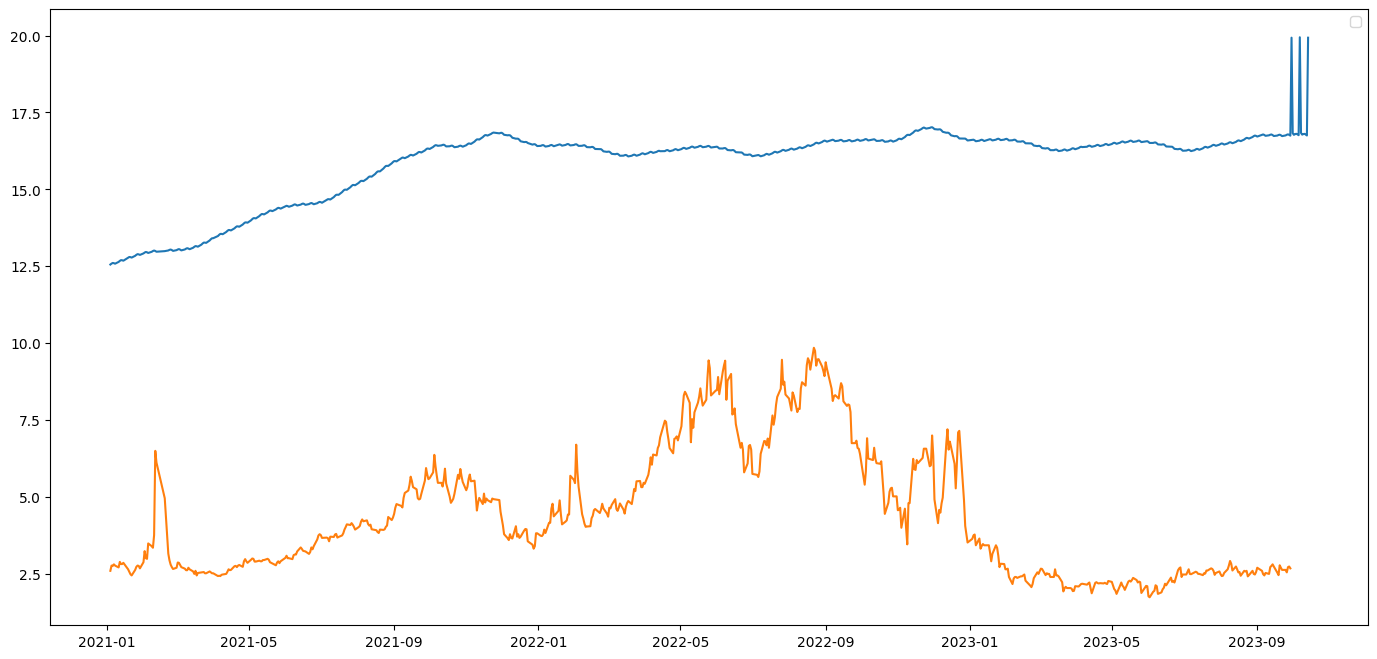

In [ ]:
plot_price_forecast(cmp_df,'2021-01-01','2024-01-01')

In [ ]:
# Make predictions for the next 30 days
future = model.make_future_dataframe(periods=15)
# Include the weather variables in the future DataFrame
# Assume the weather data is stored in a pandas DataFrame called weather_future
future = pd.merge(future, pro_df, on="ds", how="left")
# Replace NaN values in the entire DataFrame with zeros
future = future.fillna(0)
# Generate the forecast values
forecast = model.predict(future)
# Plot the forecast


/usr/local/lib/python3.10/dist-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.10/dist-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.10/dist-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.10/dist-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



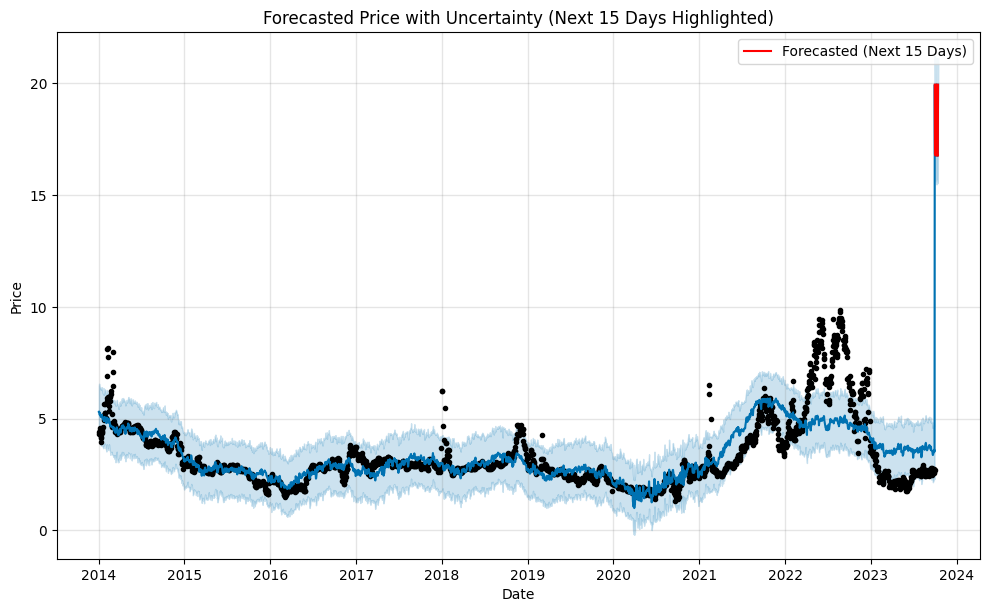

In [ ]:

# Plot the forecast
fig = model.plot(forecast, xlabel='Date', ylabel='Price', figsize=(10, 6))
plt.title('Forecasted Price with Uncertainty (Next 15 Days Highlighted)')

# Highlight the next 15 days in the plot
future_dates = forecast['ds'].tail(15)
future_forecast = forecast['yhat'].tail(15)

plt.plot(future_dates, future_forecast, color='red', label='Forecasted (Next 15 Days)')
plt.legend()

plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error

import numpy as np
common_dates = forecast['ds'].isin(pro_df['ds'])
trimmed_forecast = forecast[common_dates]

# Calculate the Mean Squared Error (MSE)
mse_prophet = mean_squared_error(pro_df['y'], trimmed_forecast['yhat'])

# Calculate the Root Mean Squared Error (RMSE)
rmse_prophet = np.sqrt(mse_prophet)

# Calculate the Mean Absolute Error (MAE)
mae_prophet = np.mean(np.abs(trimmed_forecast['yhat'] - pro_df['y']))

print(f"Mean Squared Error (MSE): {mse_prophet:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_prophet:.2f}")
print(f"Mean Absolute Error (MAE): {mae_prophet:.2f}")


    # Create a dictionary for the current model's errors
model_errors = {
    'Model': "Prophet",
    'RMSE': rmse_prophet,
    'MSE': mse_prophet,
    'MAE': mae_prophet
}

    # Append the dictionary to the list
errors.append(model_errors)


Mean Squared Error (MSE): 0.90
Root Mean Squared Error (RMSE): 0.95
Mean Absolute Error (MAE): 0.58


### ARIMA

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
arima_df = data.copy()

In [ ]:
 def test_stationarity(ts):

    rolmean = ts.rolling(window=12).mean()
    rolstd = ts.rolling(window=12).std()

    orig = plt.plot(ts, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(ts['Price'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

<ipython-input-84-1d9e0811872e>:3: FutureWarning:

Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object')

<ipython-input-84-1d9e0811872e>:4: FutureWarning:

Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object')



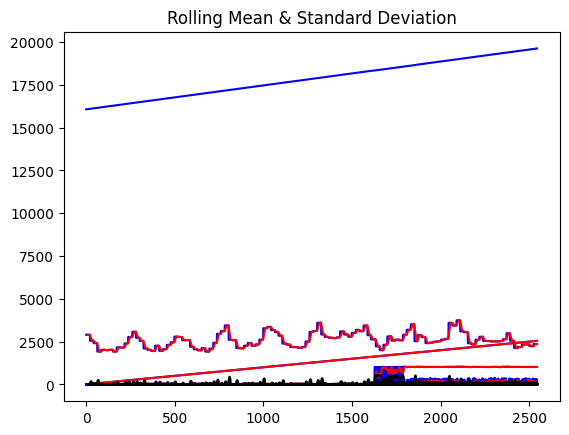

Results of Dickey-Fuller Test:
Test Statistic                   -3.001252
p-value                           0.034778
#Lags Used                       25.000000
Number of Observations Used    2440.000000
Critical Value (1%)              -3.433033
Critical Value (5%)              -2.862725
Critical Value (10%)             -2.567401
dtype: float64


In [ ]:
test_stationarity(arima_df)

p-value > 0.05 estacionalidad no hace. falt diferenciacion

In [ ]:
data_diff = arima_df['Price'].diff().dropna()


In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(data_diff)
# Extraer el p value y las estadisticas de tes
test_statistic = result[0]
p_value = result[1]

# Display the results
print(f'Test Statistic: {test_statistic}')
print(f'p-value: {p_value}')

Test Statistic: -10.90120703698485
p-value: 1.1580258499194105e-19


In [ ]:
d = 1 #estacionalidad adquiridad en un paso

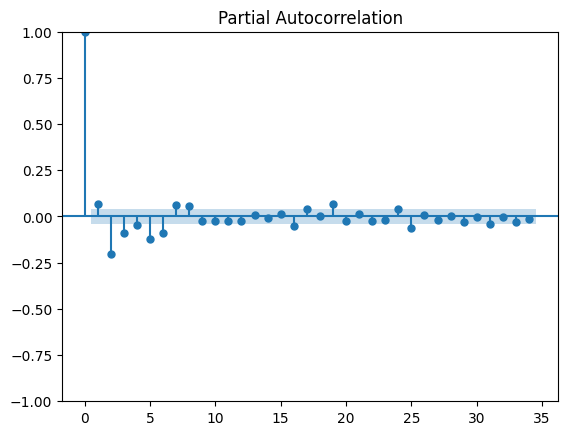

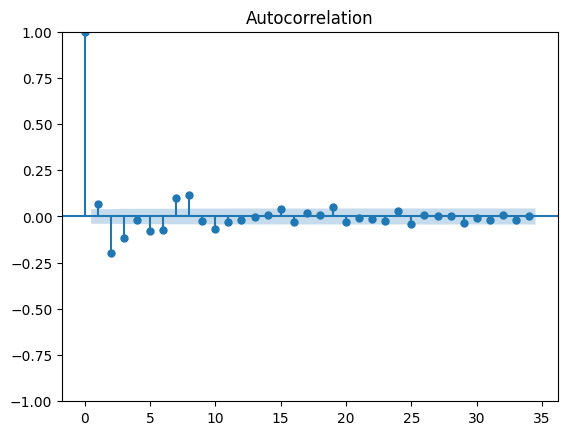

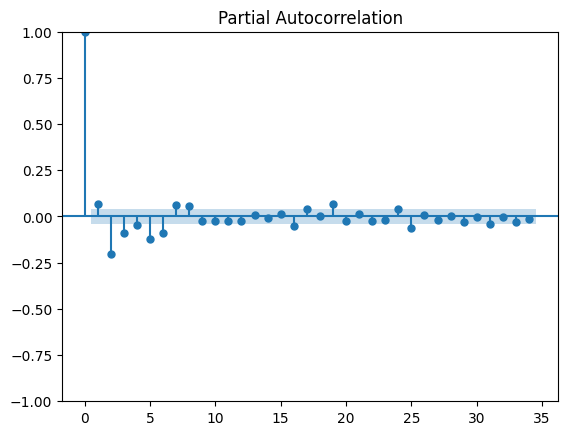

In [ ]:

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
#graficas de autocorrelaciones
plot_acf(data_diff )
plot_pacf(data_diff)

In [ ]:
import numpy as np

# Implementing own function to create ACF plot
def get_acf_plot(ts):
    #calling acf function from stattools
    y = ts
    lag_acf = acf(y, nlags=500)
    plt.figure(figsize=(16, 7))
    plt.plot(lag_acf, marker="o")
    plt.axhline(y=0,linestyle='--',color='gray')
    plt.axhline(y=-1.96/np.sqrt(len(y)),linestyle='--',color='gray')
    plt.axhline(y=1.96/np.sqrt(len(y)),linestyle='--',color='gray')
    plt.title('Autocorrelation Function')
    plt.xlabel('number of lags')
    plt.ylabel('correlation')

def get_pacf_plot(ts):
    #calling pacf function from stattools
    y = ts
    lag_pacf = pacf(y, nlags=50)
    plt.figure(figsize=(16, 7))
    plt.plot(lag_pacf, marker="o")
    plt.axhline(y=0,linestyle='--',color='gray')
    plt.axhline(y=-1.96/np.sqrt(len(y)),linestyle='--',color='gray')
    plt.axhline(y=1.96/np.sqrt(len(y)),linestyle='--',color='gray')
    plt.title('Partial Autocorrelation Function')
    plt.xlabel('number of lags')
    plt.ylabel('correlation')


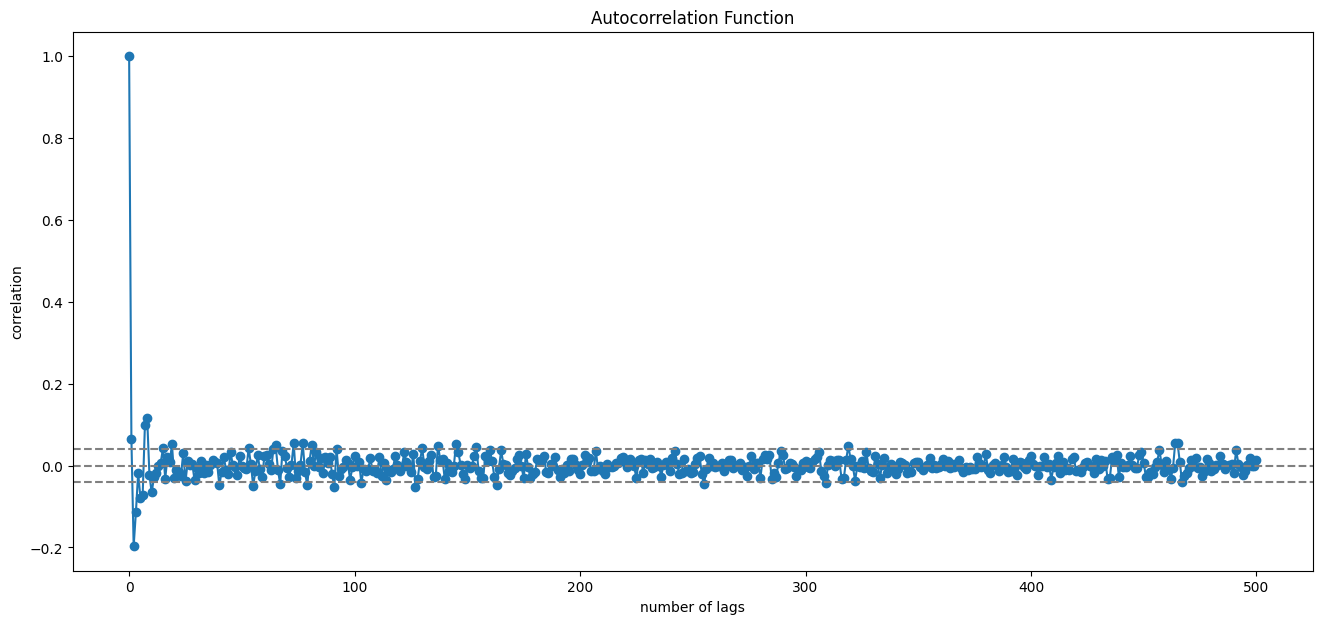

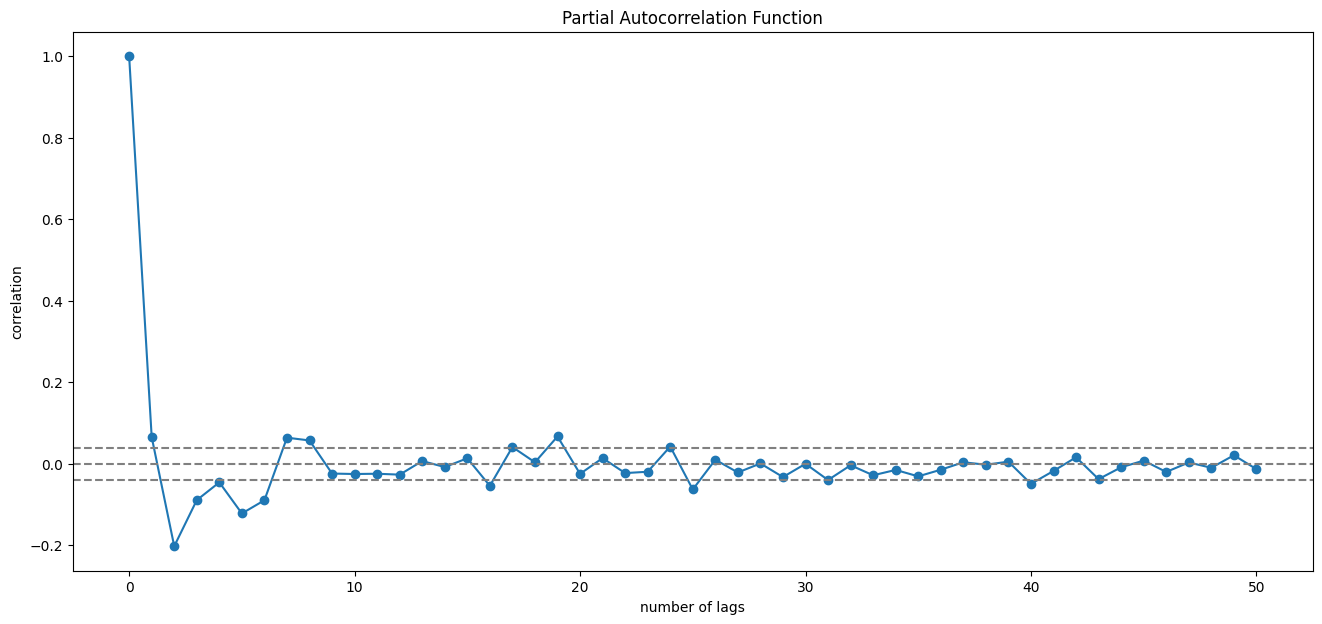

In [ ]:
get_acf_plot(data_diff)
get_pacf_plot(data_diff)

In [ ]:
q=3
p=2
d=1

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Assuming 'data' contains your historical Price and weather data in a DataFrame with 'Date' column

# Define SARIMA parameters
order = (p,d,q)  # Define the (p, d, q) order
seasonal_order = (1, 1, 1, 12)  # Define seasonal order for yearly seasonality

# Extract endogenous (Price) and exogenous (weather) variables
endog = data['Price']
exog = data.drop(['Date', 'Price'], axis=1)  # Assuming other columns are weather variables

# Fit SARIMAX model with exogenous variables
model = SARIMAX(endog=endog, exog=exog, order=order, seasonal_order=seasonal_order)
results = model.fit()

# Forecast for the next 15 days
forecast = results.get_forecast(steps=15, exog=exog.tail(15))

# Extract forecasted values
forecasted_values = forecast.predicted_mean.values

# Assuming 'actual_data' contains the actual Price values for the forecasted period
actual_data = data['Price'].tail(15).values  # Extract actual Price values for the forecasted period

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(actual_data, forecasted_values))
mae = mean_absolute_error(actual_data, forecasted_values)
mse = mean_squared_error(actual_data, forecasted_values)



print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')

# Create a dictionary for the current model's errors
model_errors = {
    'Model': "ARIMA",
    'RMSE': rmse,
    'MSE': mse,
    'MAE': mae
}

# Append the dictionary to the list
errors.append(model_errors)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



RMSE: 0.29
MAE: 0.26


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



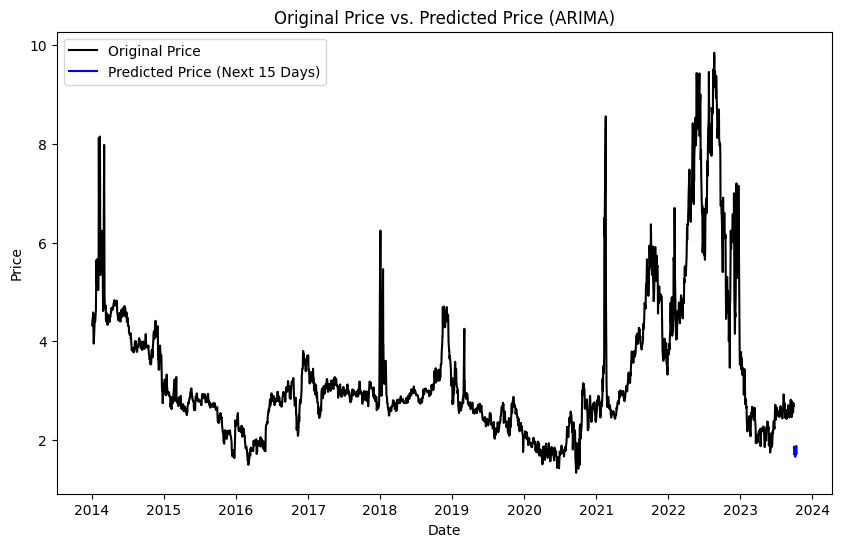

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'data' contains your historical Price and weather data in a DataFrame with 'Date' column

# Plot original data and forecasted values
plt.figure(figsize=(10, 6))

# Plot original Price data
plt.plot(data['Date'], data['Price'], label='Original Price', color='black')


# Predicted dates for the next 15 days
future_dates = pd.date_range(start=data['Date'].max() + pd.Timedelta(days=1), periods=15, freq='D')  # Start from the day after the last available date
# Plot SARIMA predicted values for the next 15 days
plt.plot(future_dates, forecasted_values[:15], label='Predicted Price (Next 15 Days)', color='blue')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Original Price vs. Predicted Price (ARIMA)')
plt.legend()
plt.show()


## Comparison

In [ ]:
errors.pop()

{'Model': 'Prophet', 'RMSE': 0.950946, 'MSE': 0.904298, 'MAE': 0.582711}

In [ ]:
model_errors = {
    'Model': "Prophet",
    'RMSE': 0.950946,
    'MSE': 0.904298,
    'MAE': 0.582711
}

# Append the dictionary to the list


In [ ]:
errors_df
Prophet	0.950946	0.904298	0.582711
1	ARIMA	0.271740	0.073843	0.236844

Model      RMSE       MSE       MAE
0       Linear Regression  3.059441  9.360181  2.298075
1  Support Vector Machine  2.678358  7.173600  2.323035
2           Random Forest  2.493223  6.216160  2.191544
3       Gradient Boosting  2.386955  5.697552  2.055679
4                    VARX  3.127429  9.780812  2.323558
5                    LSTM  0.632085  0.399531  0.481481
6                     DNN  0.760439  0.578267  0.466420
7                   ARIMA  0.271740  0.073843  0.236844
8                 Prophet  0.950946  0.904298  0.582711

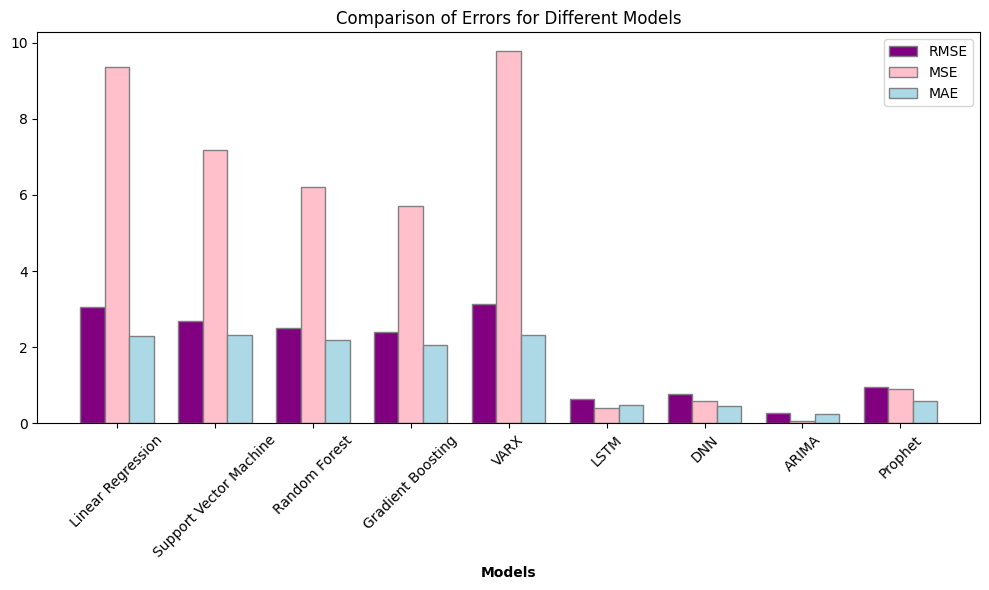

In [ ]:
import matplotlib.pyplot as plt

# Assuming you already have the 'errors_df' DataFrame with errors for each model
errors_df = pd.DataFrame(errors)


# Assuming you already have the 'errors_df' DataFrame with errors for each model

# Set the model names as the legend labels
models = errors_df['Model']

# Set the error values for each type of error
rmse = errors_df['RMSE']
mse = errors_df['MSE']
mae = errors_df['MAE']

# Set the positions of the bars on the x-axis
bar_positions = range(len(models))

# Set the width of the bars
bar_width = 0.25

# Plotting the bar chart
plt.figure(figsize=(10, 6))

plt.bar(bar_positions, rmse, color='purple', width=bar_width, edgecolor='grey', label='RMSE')
plt.bar([pos + bar_width for pos in bar_positions], mse, color='pink', width=bar_width, edgecolor='grey', label='MSE')
plt.bar([pos + 2 * bar_width for pos in bar_positions], mae, color='lightblue', width=bar_width, edgecolor='grey', label='MAE')

# Add xticks on the middle of the group bars
plt.xlabel('Models', fontweight='bold')
plt.xticks([pos + bar_width for pos in bar_positions], models, rotation=45)

# Create legend
plt.legend()

# Show the plot
plt.title('Comparison of Errors for Different Models')
plt.tight_layout()
plt.show()


# V1

### carga de datos v1

In [ ]:
import io, os, sys, setuptools, tokenize
!pip install convertdate
!pip install lunarcalendar
!pip install pystan==2.19.1.1
!pip install holidays==0.10.3  # Specify a compatible version of holidays
!pip install fbprophet


  Using cached holidays-0.10.3-py3-none-any.whl
  Attempting uninstall: holidays
    Found existing installation: holidays 0.37
    Uninstalling holidays-0.37:
      Successfully uninstalled holidays-0.37
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
prophet 1.1.5 requires cmdstanpy>=1.0.4, but you have cmdstanpy 0.9.5 which is incompatible.
prophet 1.1.5 requires holidays>=0.25, but you have holidays 0.10.3 which is incompatible.


In [ ]:
from google.colab import files

uploaded = files.upload()


In [ ]:
import pandas as pd
import io

file_name = 'w20-23.xlsx'
raw_data = pd.read_excel(io.BytesIO(uploaded[file_name]),sheet_name=1, engine='openpyxl')

print(raw_data)

     Unnamed: 0                                         Unnamed: 1 Unnamed: 2  \
0           NaN                                                NaN        NaN   
1           NaN  Weekly oil prices in Brent, OPEC basket, and W...        NaN   
2           NaN  Closing price of Brent, OPEC basket, and WTI c...        NaN   
3           NaN                                                NaN      Brent   
4           NaN                                         Mar 2, '20       51.9   
..          ...                                                ...        ...   
174         NaN                                        May 30, '23      73.54   
175         NaN                                         Jun 5, '23      76.47   
176         NaN                                        Jun 12, '23      71.82   
177         NaN                                        Jun 20, '23      75.89   
178         NaN                                        Jun 26, '23      74.35   

      Unnamed: 3 Unnamed: 4

In [ ]:
dfcropped = raw_data.drop(raw_data.index[0:3])
dfcroppedcol = dfcropped.drop(columns=dfcropped.columns[0])

print(dfcroppedcol)

      Unnamed: 1 Unnamed: 2   Unnamed: 3 Unnamed: 4
3            NaN      Brent  OPEC basket        WTI
4     Mar 2, '20       51.9        51.65      46.75
5     Mar 6, '20      45.27        48.33      41.28
6    Mar 10, '20      37.22        35.73      34.36
7    Mar 16, '20      30.05        30.63       28.7
..           ...        ...          ...        ...
174  May 30, '23      73.54        75.19      69.46
175   Jun 5, '23      76.47        77.09      72.15
176  Jun 12, '23      71.82        72.96      67.12
177  Jun 20, '23      75.89        76.85       70.5
178  Jun 26, '23      74.35        74.65      69.37

[176 rows x 4 columns]


In [ ]:

# Obtener la primera columna de valores
new_column_names = dfcroppedcol.iloc[0]
print(new_column_names)
dfcroppedcol.columns = new_column_names
dfcroppedcol.columns.values[0] = "Date"
dfcroppedcol.columns.values[1] = "Price"

print(dfcroppedcol)


Unnamed: 1            NaN
Unnamed: 2          Brent
Unnamed: 3    OPEC basket
Unnamed: 4            WTI
Name: 3, dtype: object
3           Date  Price  OPEC basket    WTI
3           Date  Price  OPEC basket    WTI
4     Mar 2, '20   51.9        51.65  46.75
5     Mar 6, '20  45.27        48.33  41.28
6    Mar 10, '20  37.22        35.73  34.36
7    Mar 16, '20  30.05        30.63   28.7
..           ...    ...          ...    ...
174  May 30, '23  73.54        75.19  69.46
175   Jun 5, '23  76.47        77.09  72.15
176  Jun 12, '23  71.82        72.96  67.12
177  Jun 20, '23  75.89        76.85   70.5
178  Jun 26, '23  74.35        74.65  69.37

[176 rows x 4 columns]


In [ ]:
df = dfcroppedcol

In [ ]:
df['Date'] = pd.to_datetime(df['Date'].str.replace("'", ""), format="%b %d, %y", errors='coerce')

df.dropna(subset=['Date'], inplace=True)
print(df)


3         Date  Price OPEC basket    WTI
4   2020-03-02   51.9       51.65  46.75
5   2020-03-06  45.27       48.33  41.28
6   2020-03-10  37.22       35.73  34.36
7   2020-03-16  30.05       30.63   28.7
8   2020-03-24  27.15       26.53  24.01
..         ...    ...         ...    ...
174 2023-05-30  73.54       75.19  69.46
175 2023-06-05  76.47       77.09  72.15
176 2023-06-12  71.82       72.96  67.12
177 2023-06-20  75.89       76.85   70.5
178 2023-06-26  74.35       74.65  69.37

[172 rows x 4 columns]


In [ ]:
df= df.iloc[:, :2]
df.info

<bound method DataFrame.info of 3         Date  Price
4   2020-03-02   51.9
5   2020-03-06  45.27
6   2020-03-10  37.22
7   2020-03-16  30.05
8   2020-03-24  27.15
..         ...    ...
174 2023-05-30  73.54
175 2023-06-05  76.47
176 2023-06-12  71.82
177 2023-06-20  75.89
178 2023-06-26  74.35

[172 rows x 2 columns]>

In [ ]:
from google.colab import files

uploaded = files.upload()


Saving BrentOilPrices.csv to BrentOilPrices.csv


In [ ]:
import pandas as pd
import io

file_name = 'BrentOilPrices.csv'
data = pd.read_csv(file_name)

print(data['Date'])

0       May 20, 1987
1       May 21, 1987
2       May 22, 1987
3       May 25, 1987
4       May 26, 1987
            ...     
8211    Sep 24, 2019
8212    Sep 25, 2019
8213    Sep 26, 2019
8214    Sep 27, 2019
8215    Sep 30, 2019
Name: Date, Length: 8216, dtype: object


In [ ]:
df2 = pd.DataFrame(data)

# Transformamos a formato datetime
df2['Date'] = pd.to_datetime(df2['Date'], errors='coerce')

# eliminamos los fallos de transformacion
df2.dropna(subset=['Date'], inplace=True)
print(df2)


           Date  Price
0    1987-05-20  18.63
1    1987-05-21  18.45
2    1987-05-22  18.55
3    1987-05-25  18.60
4    1987-05-26  18.63
...         ...    ...
8211 2019-09-24  64.13
8212 2019-09-25  62.41
8213 2019-09-26  62.08
8214 2019-09-27  62.48
8215 2019-09-30  60.99

[8216 rows x 2 columns]


In [ ]:
merged_df = pd.merge(df2, df, on='Date', how='outer', suffixes=('_df2', '_df1'))
merged_df['Price'] = merged_df.apply(lambda row: row['Price_df1'] if pd.isnull(row['Price_df2']) else row['Price_df2'], axis=1)

# Mergeando las dos db
merged_df.drop(['Price_df1', 'Price_df2'], axis=1, inplace=True)
df = merged_df
arima_df = df
print(arima_df)


           Date  Price
0    1987-05-20  18.63
1    1987-05-21  18.45
2    1987-05-22  18.55
3    1987-05-25  18.60
4    1987-05-26  18.63
...         ...    ...
8383 2023-05-30  73.54
8384 2023-06-05  76.47
8385 2023-06-12  71.82
8386 2023-06-20  75.89
8387 2023-06-26  74.35

[8388 rows x 2 columns]


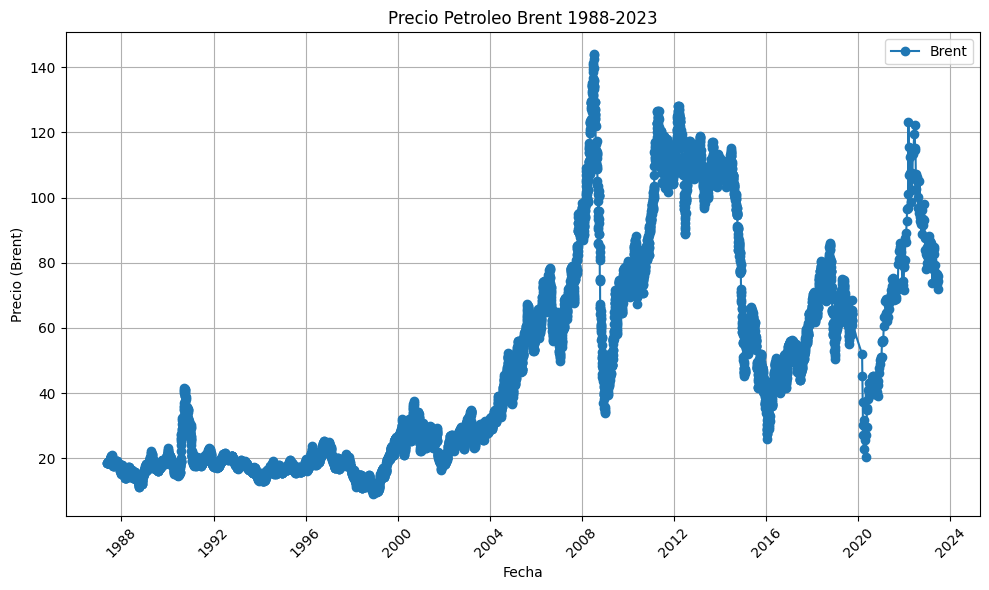

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Conversion date formato datetime
df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Price'], marker='o', label='Brent')
plt.xlabel('Fecha')
plt.ylabel('Precio (Brent)')
plt.title('Precio Petroleo Brent 1988-2023')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
def plot_price_trend(df, start_date, end_date):
    """
    Filtra el df y genera un grafico de entre dos fechas usando mask para filtrar

    """
    mask = (df['Date'] > start_date) & (df['Date'] <= end_date)
    sdf = df.loc[mask]
    plt.figure(figsize = (10,5))
    chart = sns.lineplot(x='Date',y='Price',data = sdf)
    plt.title("Precio Petroleo Brent")

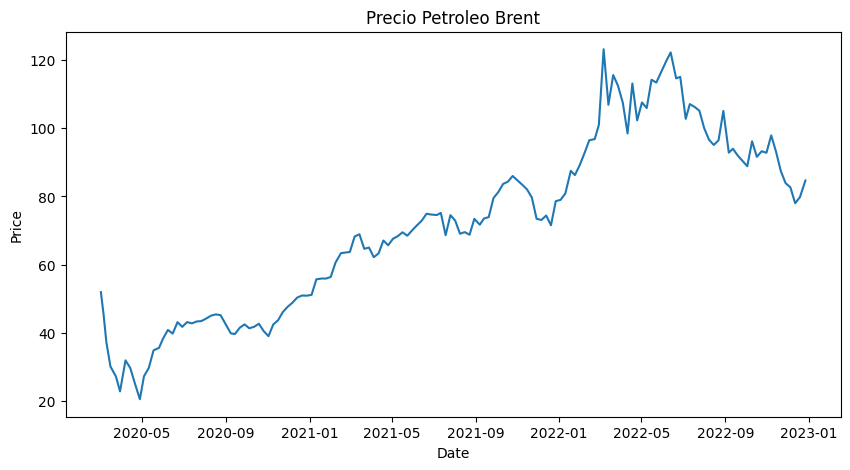

In [ ]:
plot_price_trend(df,'2020-01-01','2023-01-01')

## Corelacion Petroleo Brent y Gas natural

In [ ]:
from google.colab import files

uploaded = files.upload()


Saving pink-sheet.xlsx to pink-sheet.xlsx


In [ ]:
import pandas as pd
import io

file_name = 'pink-sheet.xlsx'
raw_data = pd.read_excel(io.BytesIO(uploaded[file_name]),sheet_name=1, engine='openpyxl')

print(raw_data)

    Unnamed: 0 Crude oil, Brent Natural gas, Europe
0          NaN          ($/bbl)           ($/mmbtu)
1          NaN      CRUDE_BRENT            NGAS_EUR
2      1960M01             1.63            0.404774
3      1960M02             1.63            0.404774
4      1960M03             1.63            0.404774
..         ...              ...                 ...
762    2023M05             75.7           10.108756
763    2023M06            74.89           10.350625
764    2023M07             80.1            9.545284
765    2023M08           86.163           11.191945
766    2023M09               94           11.549295

[767 rows x 3 columns]


In [ ]:
dfcorel = raw_data.drop(raw_data.index[0:3])

print(dfcorel)

    Unnamed: 0 Crude oil, Brent Natural gas, Europe
3      1960M02             1.63            0.404774
4      1960M03             1.63            0.404774
5      1960M04             1.63            0.404774
6      1960M05             1.63            0.404774
7      1960M06             1.63            0.404774
..         ...              ...                 ...
762    2023M05             75.7           10.108756
763    2023M06            74.89           10.350625
764    2023M07             80.1            9.545284
765    2023M08           86.163           11.191945
766    2023M09               94           11.549295

[764 rows x 3 columns]


In [ ]:

# Asignar el nombre de las columnas
new_column_names = dfcorel.iloc[0]
print(new_column_names)
dfcorel.columns = new_column_names
dfcorel.columns.values[0] = "Date"
dfcorel.columns.values[1] = "Oil"
dfcorel.columns.values[2] = "Natural Gas"


print(dfcorel)

Unnamed: 0              1960M02
Crude oil, Brent           1.63
Natural gas, Europe    0.404774
Name: 3, dtype: object
3       Date     Oil  Natural Gas
3       Date     Oil  Natural Gas
4    1960M03    1.63     0.404774
5    1960M04    1.63     0.404774
6    1960M05    1.63     0.404774
7    1960M06    1.63     0.404774
..       ...     ...          ...
762  2023M05    75.7    10.108756
763  2023M06   74.89    10.350625
764  2023M07    80.1     9.545284
765  2023M08  86.163    11.191945
766  2023M09      94    11.549295

[764 rows x 3 columns]


In [ ]:
# Convert columns to numeric types
dfcorel["Oil"] = pd.to_numeric(dfcorel["Oil"], errors='coerce')
dfcorel["Natural Gas"] = pd.to_numeric(dfcorel["Natural Gas"], errors='coerce')

# Handle missing values (replace NaN with 0 or any other appropriate value)
dfcorel["Oil"].fillna(0, inplace=True)
dfcorel["Natural Gas"].fillna(0, inplace=True)

# Calculate the correlation
correlation = dfcorel["Oil"].corr(dfcorel["Natural Gas"])
print(f'Correlacion entre Petroleo y Gas Natural: {correlation}')


Correlacion entre Petroleo y Gas Natural: 0.7126731076261978


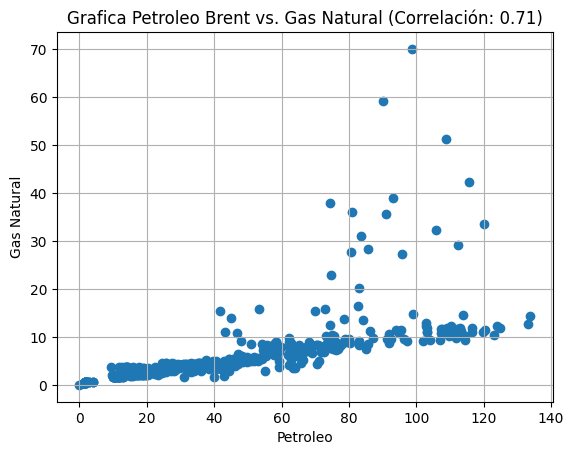

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot
plt.scatter(dfcorel["Oil"], dfcorel["Natural Gas"])
plt.xlabel("Petroleo")
plt.ylabel("Gas Natural")
plt.title(f"Grafica Petroleo Brent vs. Gas Natural (Correlación: {correlation:.2f})")
plt.grid(True)

# Display the plot
plt.show()


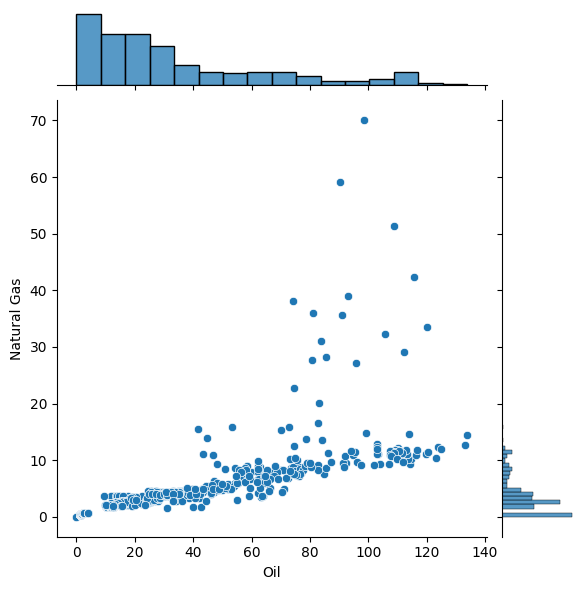

In [ ]:
import seaborn as sns

sns.jointplot(x="Oil", y="Natural Gas", data=dfcorel, kind="scatter")
plt.show()


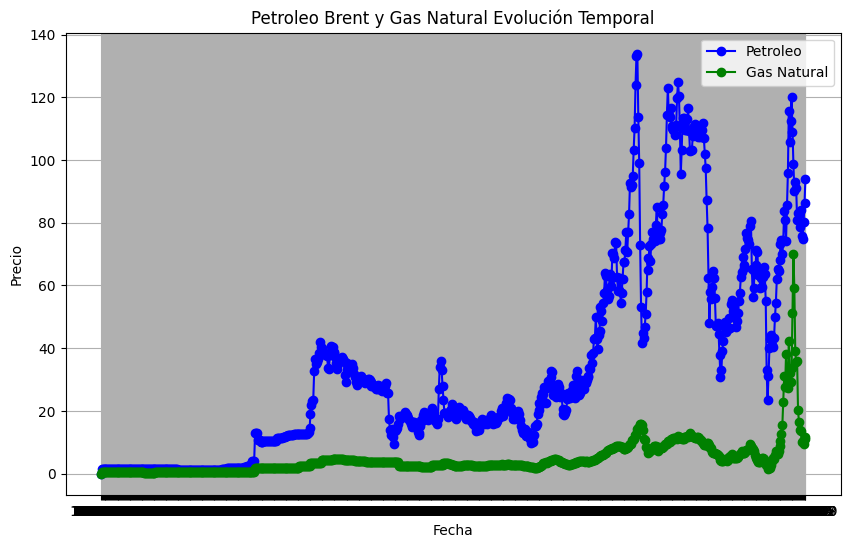

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(dfcorel["Date"], dfcorel["Oil"], label="Petroleo", marker='o', linestyle='-', color='blue')
plt.plot(dfcorel["Date"], dfcorel["Natural Gas"], label="Gas Natural", marker='o', linestyle='-', color='green')
plt.xlabel("Fecha")
plt.ylabel("Precio")
plt.title("Petroleo Brent y Gas Natural Evolución Temporal")
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-10-ae2e09355087>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dfcorel.corr()


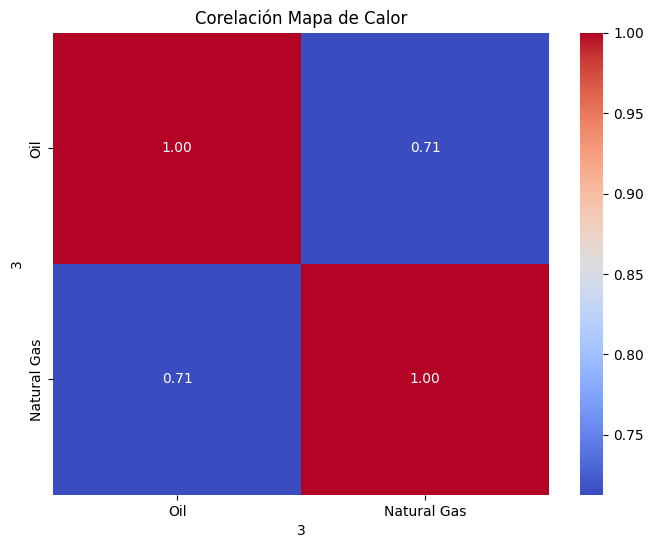

In [ ]:
import seaborn as sns

# Calcular la matrix de correlacion
correlation_matrix = dfcorel.corr()

# Creando el mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Corelación Mapa de Calor")
plt.show()


----------


## Prophet

In [ ]:
# Install the Prophet library
!pip install fbprophet
# Import the Prophet library
from prophet import Prophet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 16.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 39.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 MB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 103.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 7.8 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for fbprophet

NameError: ignored

In [ ]:
# Make predictions for the next 30 days
future = model.make_future_dataframe(periods=30)
# Include the weather variables in the future DataFrame
# Assume the weather data is stored in a pandas DataFrame called weather_future
future = pd.merge(future, weather_future, on="ds", how="left")
# Generate the forecast values
forecast = model.predict(future)
# Plot the forecast
model.plot(forecast)
plt.show()


In [ ]:
from fbprophet import Prophet
m = Prophet()
pro_df = df
#para usar prophet tenemos que cambiar los nombres de la columnas
pro_df.columns = ['ds','y']
pro_df.head()

ds      y
0 1987-05-20  18.63
1 1987-05-21  18.45
2 1987-05-22  18.55
3 1987-05-25  18.60
4 1987-05-26  18.63

In [ ]:
#prediciendo el futuro a 90 dias probabilistico
m.fit(pro_df)
future = m.make_future_dataframe(periods = 90)
forecast = m.predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/usr/local/lib/python3.10/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.10/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.10/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [ ]:
forecast.head()


ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 1987-05-20  16.469653    1.892864   32.589239    16.469653    16.469653   
1 1987-05-21  16.473057    1.574090   32.109363    16.473057    16.473057   
2 1987-05-22  16.476462    1.377054   33.722767    16.476462    16.476462   
3 1987-05-25  16.486676    1.968884   34.541580    16.486676    16.486676   
4 1987-05-26  16.490081    2.219706   33.594996    16.490081    16.490081   

   additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
0        0.675930              0.675930              0.675930 -0.773615   
1        0.836492              0.836492              0.836492 -0.617215   
2        0.744260              0.744260              0.744260 -0.711338   
3        2.521461              2.521461              2.521461  1.074220   
4        0.834987              0.834987              0.834987 -0.604845   

   weekly_lower  weekly_upper    yearly  yearly_lower  yearly_upper  \
0     -0.773615     -0.773615  1.449545      1.449545      1.449545   
1     -0.617215     -0.617215  1.453707      1.453707      1.453707   
2     -0.711338     -0.711338  1.455598      1.455598      1.455598   
3      1.074220      1.074220  1.447241      1.447241      1.447241   
4     -0.604845     -0.604845  1.439832      1.439832      1.439832   

   multiplicative_terms  multiplicative_terms_lower  \
0                   0.0                         0.0   
1                   0.0                         0.0   
2                   0.0                         0.0   
3                   0.0                         0.0   
4                   0.0                         0.0   

   multiplicative_terms_upper       yhat  
0                         0.0  17.145583  
1                         0.0  17.309550  
2                         0.0  17.220722  
3                         0.0  19.008137  
4                         0.0  17.325067

/usr/local/lib/python3.10/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.10/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


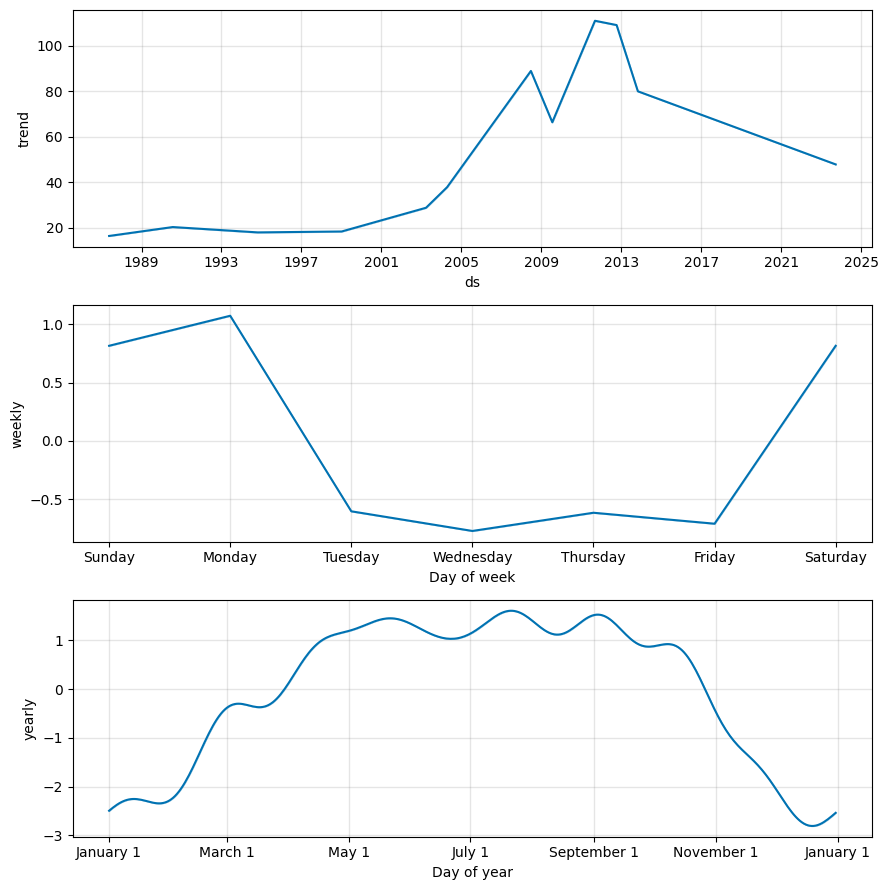

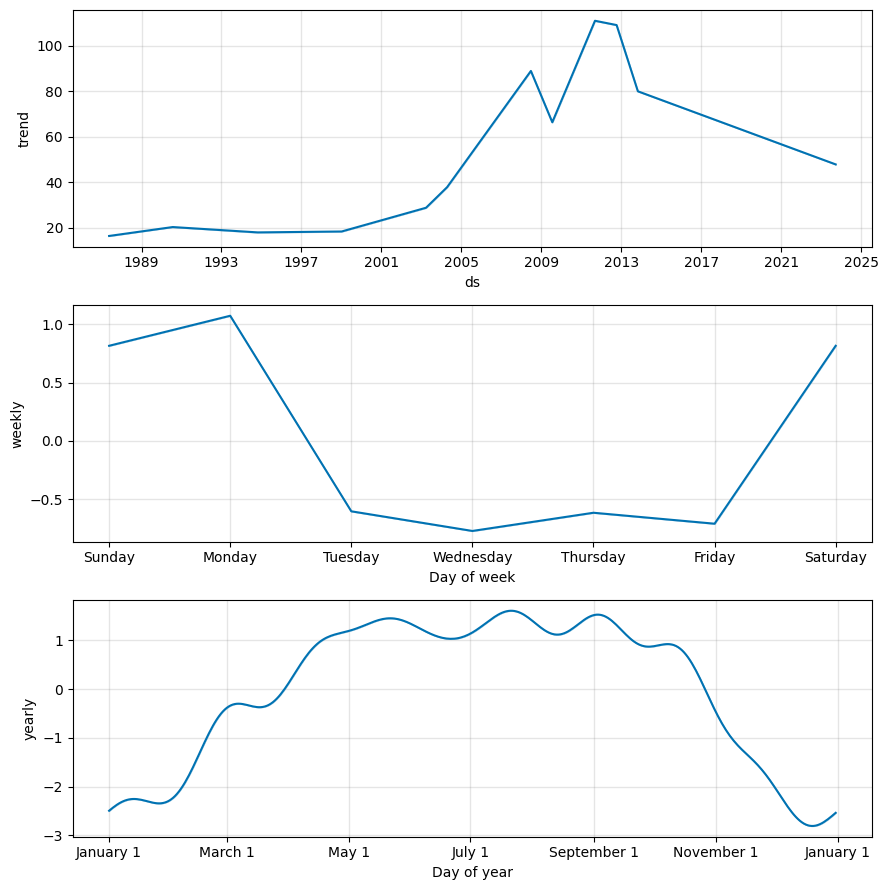

In [ ]:
m.plot_components(forecast)

In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)
plot_components_plotly(m, forecast)

/usr/local/lib/python3.10/dist-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.10/dist-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



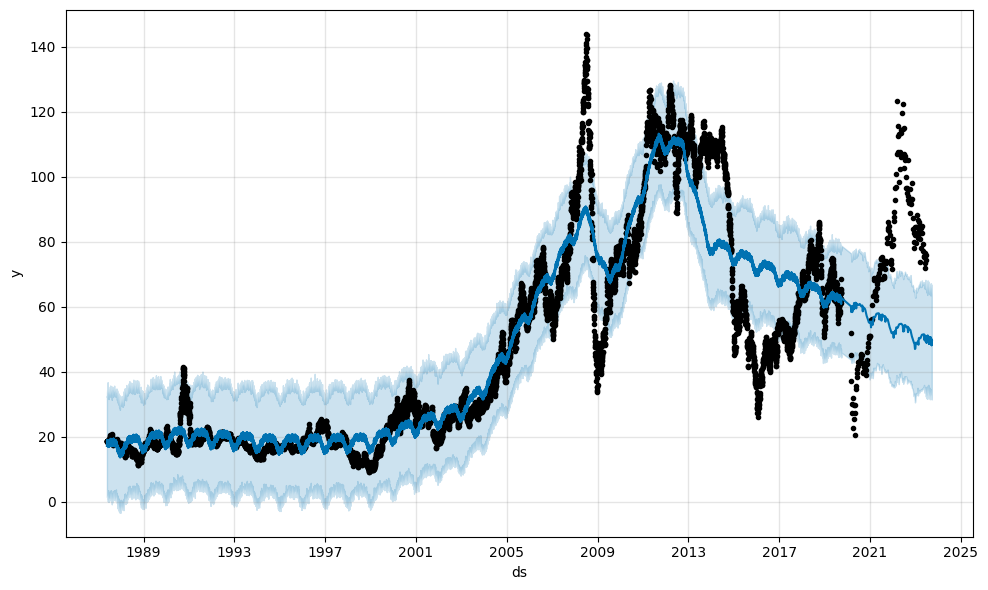

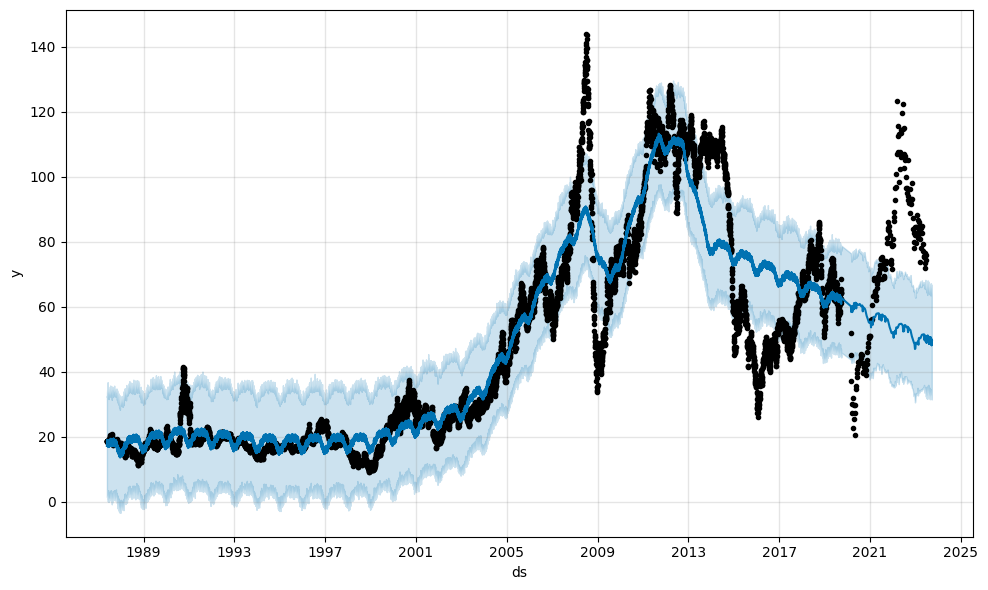

In [ ]:
m.plot(forecast)

In [ ]:
cmp_df = forecast.set_index('ds')[['yhat','yhat_lower','yhat_upper']].join(pro_df.set_index('ds'))


yhat  yhat_lower  yhat_upper      y
ds                                                  
1987-05-20  17.145583    1.892864   32.589239  18.63
1987-05-21  17.309550    1.574090   32.109363  18.45
1987-05-22  17.220722    1.377054   33.722767  18.55
1987-05-25  19.008137    1.968884   34.541580  18.60
1987-05-26  17.325067    2.219706   33.594996  18.63

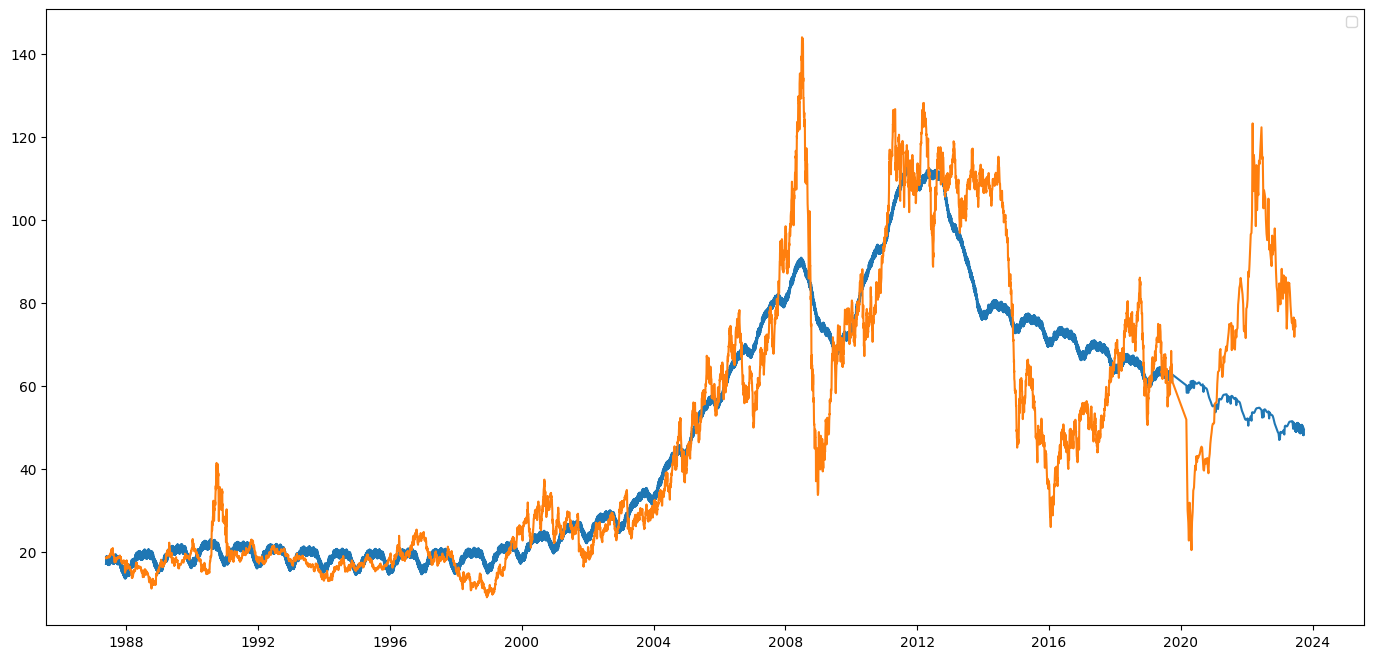

In [ ]:
plt.figure(figsize=(17,8))
plt.plot(cmp_df['yhat'])
plt.plot(cmp_df['y'])
plt.legend()
plt.show()

In [ ]:
def plot_price_forecast(df,start_date, end_date):
    """
    This function filters the dataframe for the specified date range and
    plots the actual and forecast data.

    Assumption:
    - The dataframe has to be indexed on a Datetime column
    This makes the filtering very easy in pandas using df.loc
    """
    cmp_df = df.loc[start_date:end_date]
    plt.figure(figsize=(17,8))
    plt.plot(cmp_df['yhat'])
    plt.plot(cmp_df['y'])
    plt.legend()
    plt.show()

In [ ]:
plot_price_forecast(cmp_df,'2021-01-01','2024-01-01')

NameError: ignored

In [ ]:
from sklearn.metrics import mean_squared_error
common_dates = forecast['ds'].isin(df['ds'])
trimmed_forecast = forecast[common_dates]

from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate the Mean Squared Error (MSE)
mse_prophet = mean_squared_error(df['y'], trimmed_forecast['yhat'])

# Calculate the Root Mean Squared Error (RMSE)
rmse_prophet = np.sqrt(mse_prophet)

# Calculate the Mean Absolute Error (MAE)
mae_prophet = np.mean(np.abs(trimmed_forecast['yhat'] - df['y']))

print(f"Mean Squared Error (MSE): {mse_prophet:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_prophet:.2f}")
print(f"Mean Absolute Error (MAE): {mae_prophet:.2f}")

max_y = df['y'].max()
min_y = df['y'].min()

range_y = max_y - min_y
scale_y = np.std(df['y'])  # Standard deviation can also be used as a measure of scale
print(f"Range of Target Variable (y): {range_y:.2f}")
print(f"Scale of Target Variable (y): {scale_y:.2f}")

# Compare RMSE and MAE to the range and scale
if rmse_prophet < range_y:
    print("RMSE is relatively small compared to the range of y.")
else:
    print("RMSE is relatively large compared to the range of y.")

if mae_prophet < scale_y:
    print("MAE is relatively small compared to the scale of y.")
else:
    print("MAE is relatively large compared to the scale of y.")

results_prophet = {'MSE': mse_prophet, 'MAE': mae_prophet, 'RMSE': rmse_prophet}

Mean Squared Error (MSE): 157.99
Root Mean Squared Error (RMSE): 12.57
Mean Absolute Error (MAE): 8.12
Range of Target Variable (y): 134.85
Scale of Target Variable (y): 32.75
RMSE is relatively small compared to the range of y.
MAE is relatively small compared to the scale of y.


------------------------


## ARIMA

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
arima_df.head()

Date  Price
0 1987-05-20  18.63
1 1987-05-21  18.45
2 1987-05-22  18.55
3 1987-05-25  18.60
4 1987-05-26  18.63

In [ ]:
 def test_stationarity(ts):

    rolmean = ts.rolling(window=12).mean()
    rolstd = ts.rolling(window=12).std()

    orig = plt.plot(ts, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(ts['Price'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

<ipython-input-66-6ff49e2ede52>:3: FutureWarning:

Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object')

<ipython-input-66-6ff49e2ede52>:4: FutureWarning:

Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object')



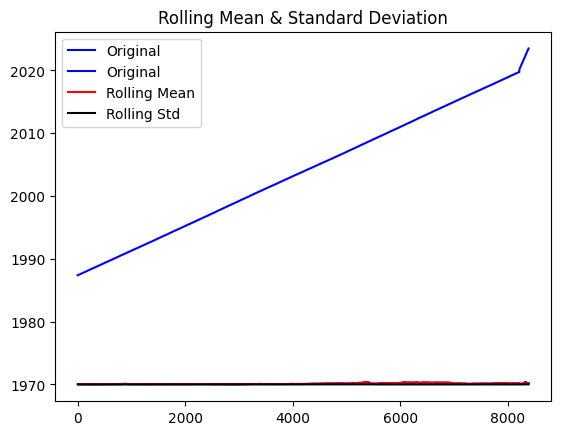

Results of Dickey-Fuller Test:
Test Statistic                   -2.125387
p-value                           0.234430
#Lags Used                       35.000000
Number of Observations Used    8352.000000
Critical Value (1%)              -3.431133
Critical Value (5%)              -2.861886
Critical Value (10%)             -2.566954
dtype: float64


In [ ]:
test_stationarity(arima_df)

La serie no tiene estacionaliadidad el p-value es mayor que 0,05

In [ ]:
data_diff = arima_df['Price'].diff().dropna()


In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(data_diff)
# Extraer el p value y las estadisticas de tes
test_statistic = result[0]
p_value = result[1]

# Display the results
print(f'Test Statistic: {test_statistic}')
print(f'p-value: {p_value}')

Test Statistic: -13.510246214503105
p-value: 2.8626320747469066e-25


In [ ]:
d = 1 #estacionalidad adquiridad en un paso

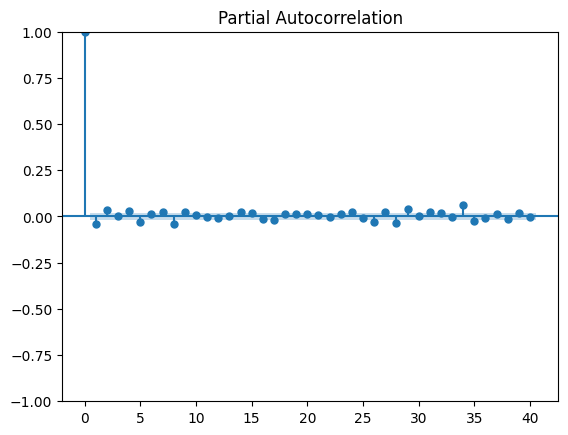

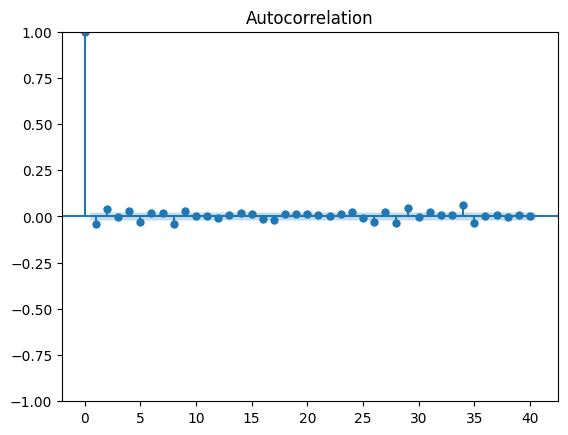

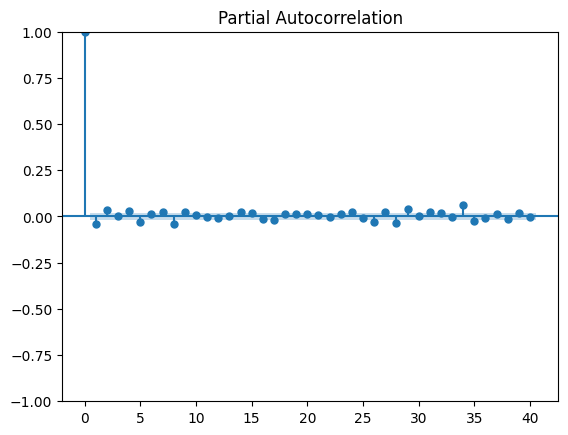

In [ ]:

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
#graficas de autocorrelaciones
plot_acf(data_diff)
plot_pacf(data_diff)

In [ ]:
import numpy as np

# Implementing own function to create ACF plot
def get_acf_plot(ts):
    #calling acf function from stattools
    y = ts
    lag_acf = acf(y, nlags=500)
    plt.figure(figsize=(16, 7))
    plt.plot(lag_acf, marker="o")
    plt.axhline(y=0,linestyle='--',color='gray')
    plt.axhline(y=-1.96/np.sqrt(len(y)),linestyle='--',color='gray')
    plt.axhline(y=1.96/np.sqrt(len(y)),linestyle='--',color='gray')
    plt.title('Autocorrelation Function')
    plt.xlabel('number of lags')
    plt.ylabel('correlation')

def get_pacf_plot(ts):
    #calling pacf function from stattools
    y = ts
    lag_pacf = pacf(y, nlags=50)
    plt.figure(figsize=(16, 7))
    plt.plot(lag_pacf, marker="o")
    plt.axhline(y=0,linestyle='--',color='gray')
    plt.axhline(y=-1.96/np.sqrt(len(y)),linestyle='--',color='gray')
    plt.axhline(y=1.96/np.sqrt(len(y)),linestyle='--',color='gray')
    plt.title('Partial Autocorrelation Function')
    plt.xlabel('number of lags')
    plt.ylabel('correlation')


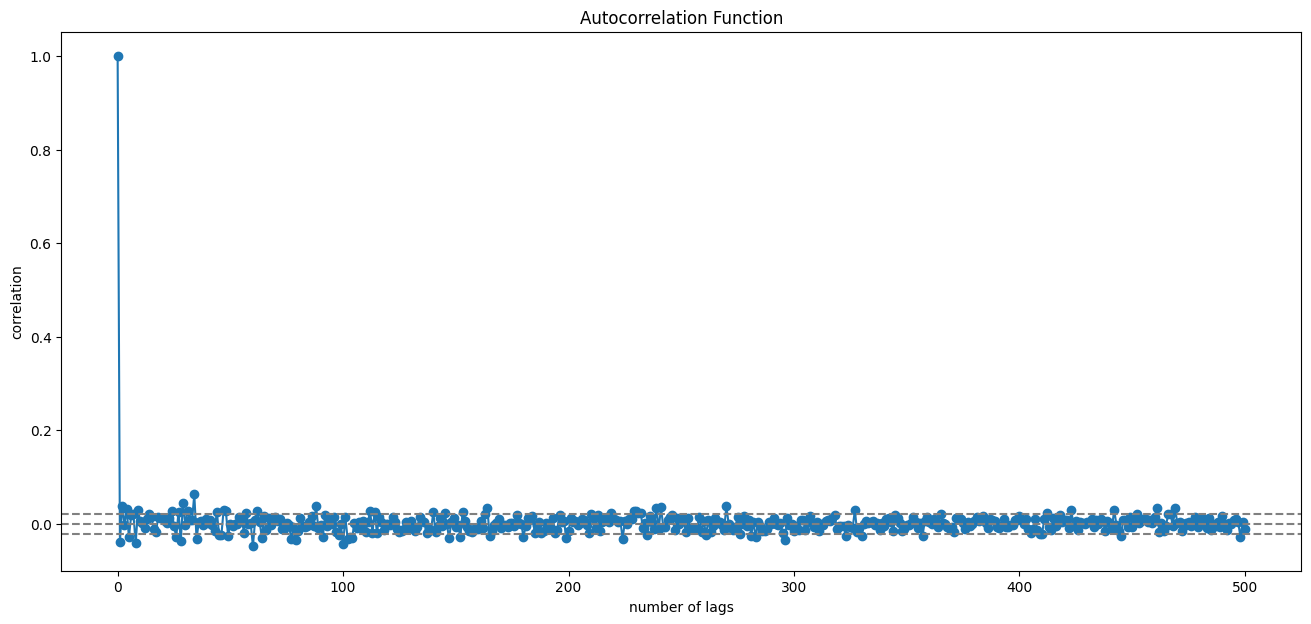

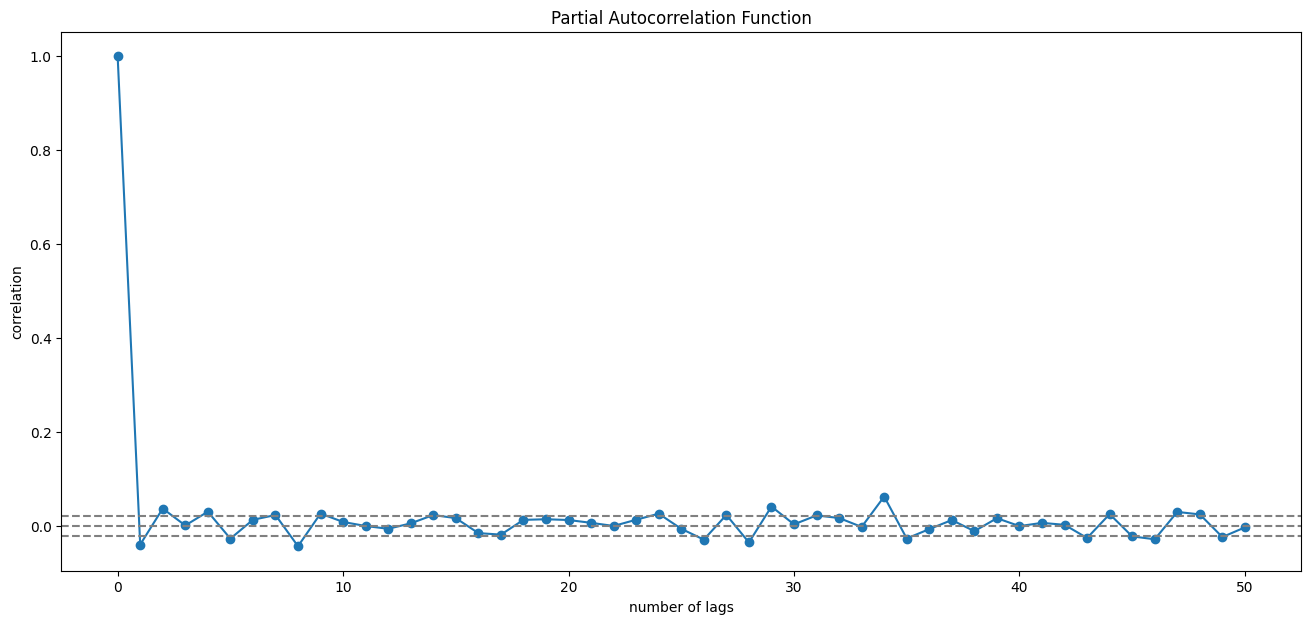

In [ ]:
get_acf_plot(data_diff)
get_pacf_plot(data_diff)

cruza el eje x en 1 lag

In [ ]:
q=1
p=5

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from math import sqrt

# Dividiendo para la validacíon cruzada
train_size = int(len(data_diff) * 0.80)
train, test = data_diff[0:train_size], data_diff[train_size:]
#Definiendo el modelo SARIMA con lo valores apropiados
model = SARIMAX(train, order=(p,d,q ), seasonal_order=(p,d,q, 12))  # Adjust the orders and seasonality as needed

# Entrenando el modelo
model_fit = model.fit(disp=0)

# Haciendo la predicción
forecasted_diff = model_fit.forecast(steps=len(test))

# Revertiendo la diferenciación
forecasted_values = forecasted_diff.cumsum()

# Prediciones a futuro en la escala original
forecasted_future_diff = model_fit.forecast(steps=90)  # Prediciendo siguiente 90 días
forecasted_future_values = forecasted_future_diff.cumsum()
forecasted_future_values_original_scale = arima_df['Price'].iloc[-1] + forecasted_future_values.cumsum()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



ValueError: ignored

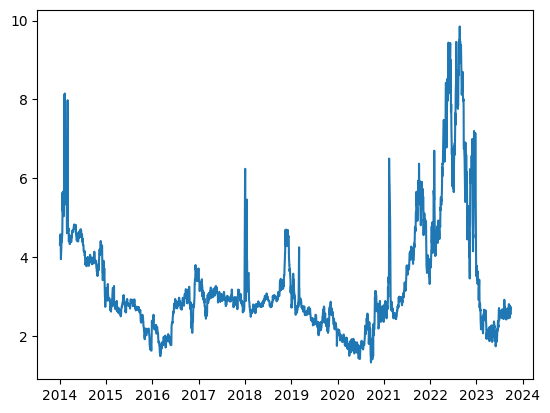

In [ ]:
import matplotlib.pyplot as plt

# Representar datos originales
plt.plot(arima_df['Date'], arima_df['Price'], label='Datos Originales')

forecasted_dates = pd.date_range(start=arima_df['Date'].iloc[-1], periods=90, freq='D')
# Representar los valores predecidos en la escala original
plt.plot(forecasted_dates , forecasted_future_values_original_scale, label='Datos Predicción')

plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt


mse_arima = mean_squared_error(test, forecasted_values)
mae_arima = mean_absolute_error(test , forecasted_values)
rmse_arima = sqrt(mse_arima)

print(f'MSE: {mse_arima}')
print(f'MAE: {mae_arima}')
print(f'RMSE: {rmse_arima}')

# Compare RMSE and MAE to the range and scale
if rmse_arima < range_y:
    print("RMSE is relatively small compared to the range of y.")
else:
    print("RMSE is relatively large compared to the range of y.")

if mae_arima < scale_y:
    print("MAE is relatively small compared to the scale of y.")
else:
    print("MAE is relatively large compared to the scale of y.")

results_arima = {'MSE': mse_arima, 'MAE': mae_arima, 'RMSE': rmse_arima}


MSE: 816.5299229143538
MAE: 24.47301034964694
RMSE: 28.574987715034172
RMSE is relatively small compared to the range of y.
MAE is relatively small compared to the scale of y.


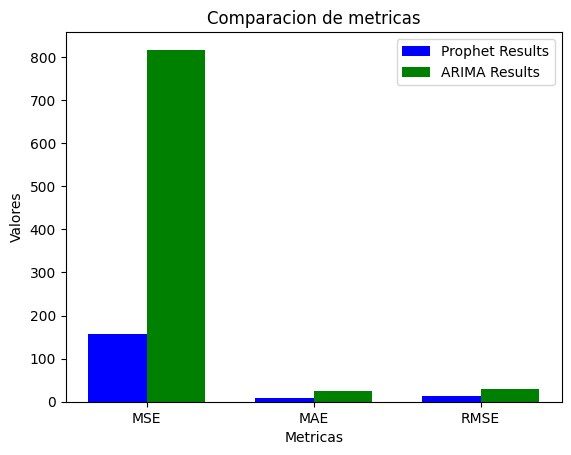

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extraer los valores de las metricas
metrics = results_prophet.keys()
values_prophet = list(results_prophet.values())
values_arima = list(results_arima.values())

bar_width = 0.35
x = np.arange(len(metrics))
fig, ax = plt.subplots()
bar1 = ax.bar(x, values_prophet, bar_width, label='Prophet Results', color='b')
bar2 = ax.bar(x + bar_width, values_arima, bar_width, label='ARIMA Results', color='g')

ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(metrics)

plt.title('Comparacion de metricas')
plt.xlabel('Metricas')
plt.ylabel('Valores')
plt.legend()
plt.show()


-----------------------------